In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import itertools
from scipy.special import kn
from scipy import optimize
from utils import *

In [2]:
# config = '24I/ml_0p01'
config = '24I/ml_0p005'
# config = '32I/ml0p008'
# config = '32I/ml0p006'
# config = '32I/ml0p004'
ainv_24I = [1.784, 0.005]
ainv_32I = [2.382, 0.008]
ainv_ensemble = gen_fake_ensemble(ainv_24I)
# ainv_ensemble = gen_fake_ensemble(ainv_32I)
# f3pt_path = '/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/analysis_output/'+config+'/3pt_output.h5'
f3pt_path = '/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/analysis_output/'+config+'/SD_output.h5'

In [3]:
f = h5py.File(f3pt_path, 'r')
L, T = f['L'][()], f['T'][()]
V = (L ** 3) * T
# C2pt_tavg = np.real(f['pion-00WW'][()])
C2_boot = np.real(f['pion-00WW'][()])
C2_pion00WP = np.real(f['pion-00WP'][()])
C2_fpWP = np.real(f['fp-00WP'][()])
C2_fpWW = np.real(f['fp-00WW'][()])
twopt_fns_boot = [C2_boot, C2_pion00WP, C2_fpWP, C2_fpWW]
labels = ['pion-00WW', 'pion-00WP', 'fp-00WP', 'fp-00WW']

<IPython.core.display.Javascript object>


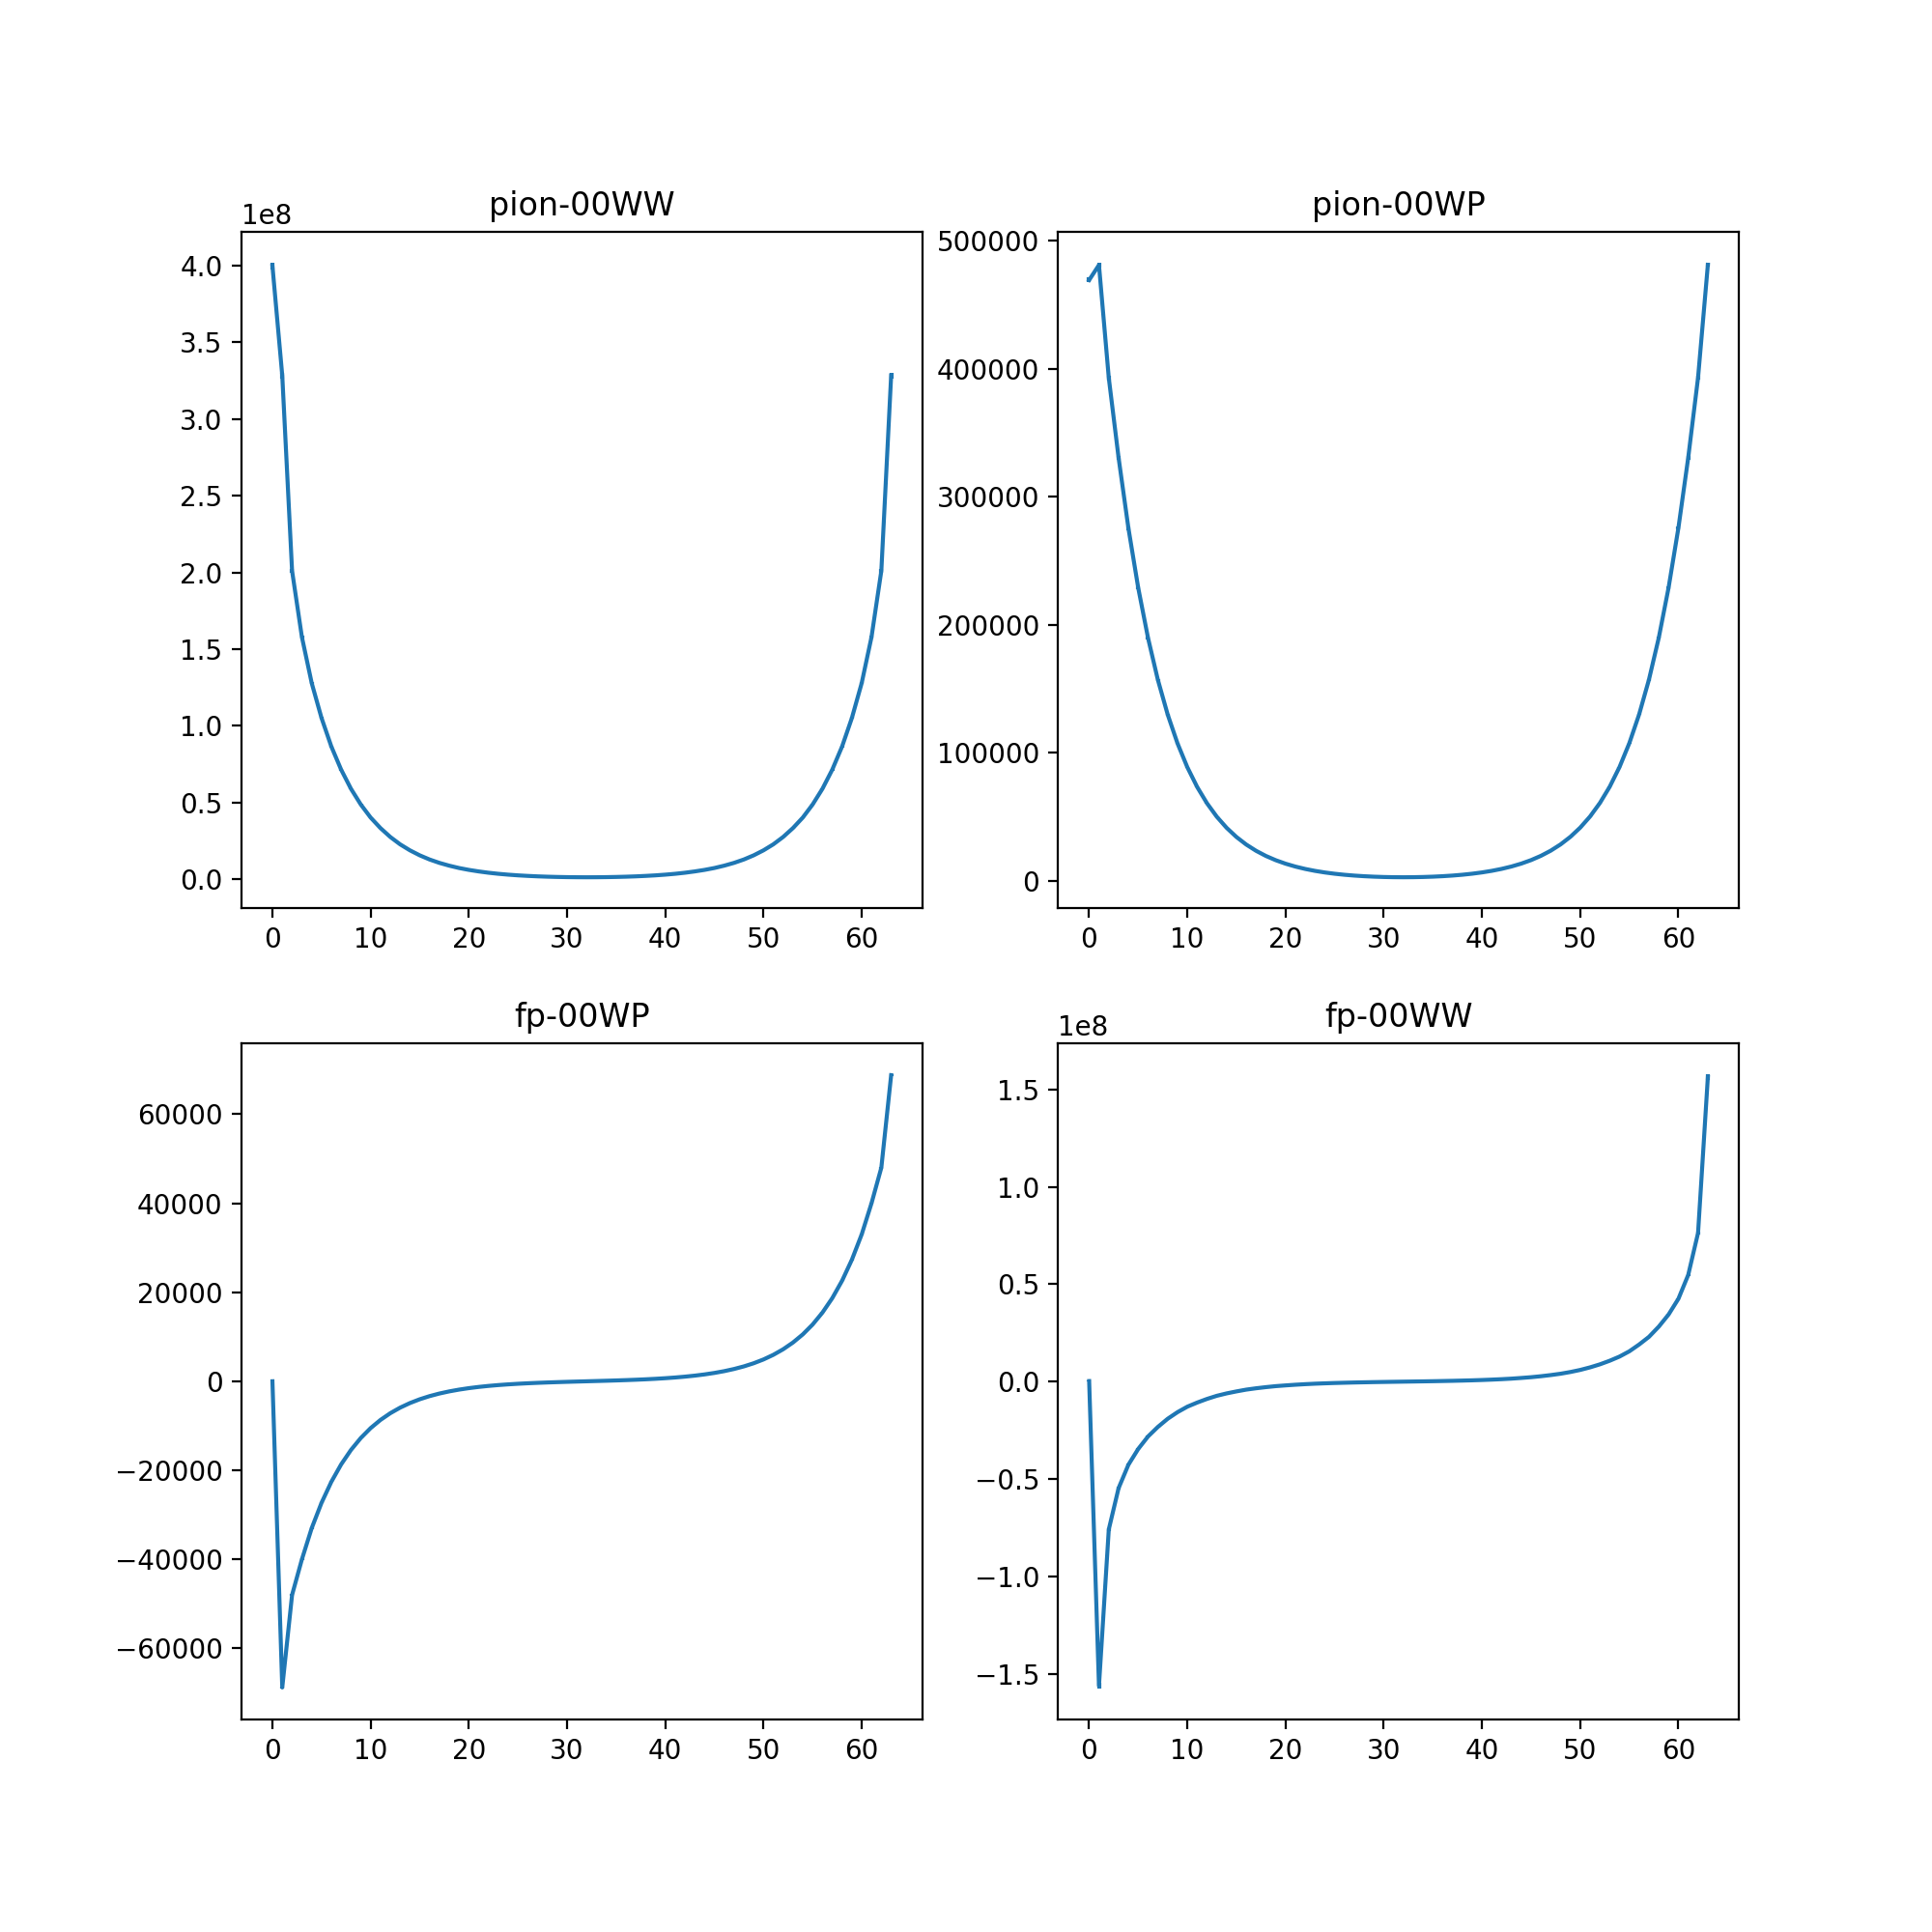

In [4]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
ax = ax.flatten()
for idx in range(len(twopt_fns_boot)):
    C2_i_mu = np.mean(twopt_fns_boot[idx], axis = 0)
    C2_i_sigma = np.std(twopt_fns_boot[idx], axis = 0, ddof = 1)
    ax[idx].errorbar(range(C2_i_mu.shape[0]), C2_i_mu, yerr = C2_i_sigma)
    ax[idx].set_title(labels[idx])

In [5]:
# fold over midpoint. For PP correlator fold sym and for AP correlator fold antisym.
C2_00WW_fold = fold(C2_boot, T)
C2_00WP_fold = fold(C2_pion00WP, T)
C2_fpWP_fold = fold(C2_fpWP, T, sym = False)
C2_fpWW_fold = fold(C2_fpWW, T, sym = False)
twopt_fns_folded = [C2_00WW_fold, C2_00WP_fold, C2_fpWP_fold, C2_fpWW_fold]

<IPython.core.display.Javascript object>


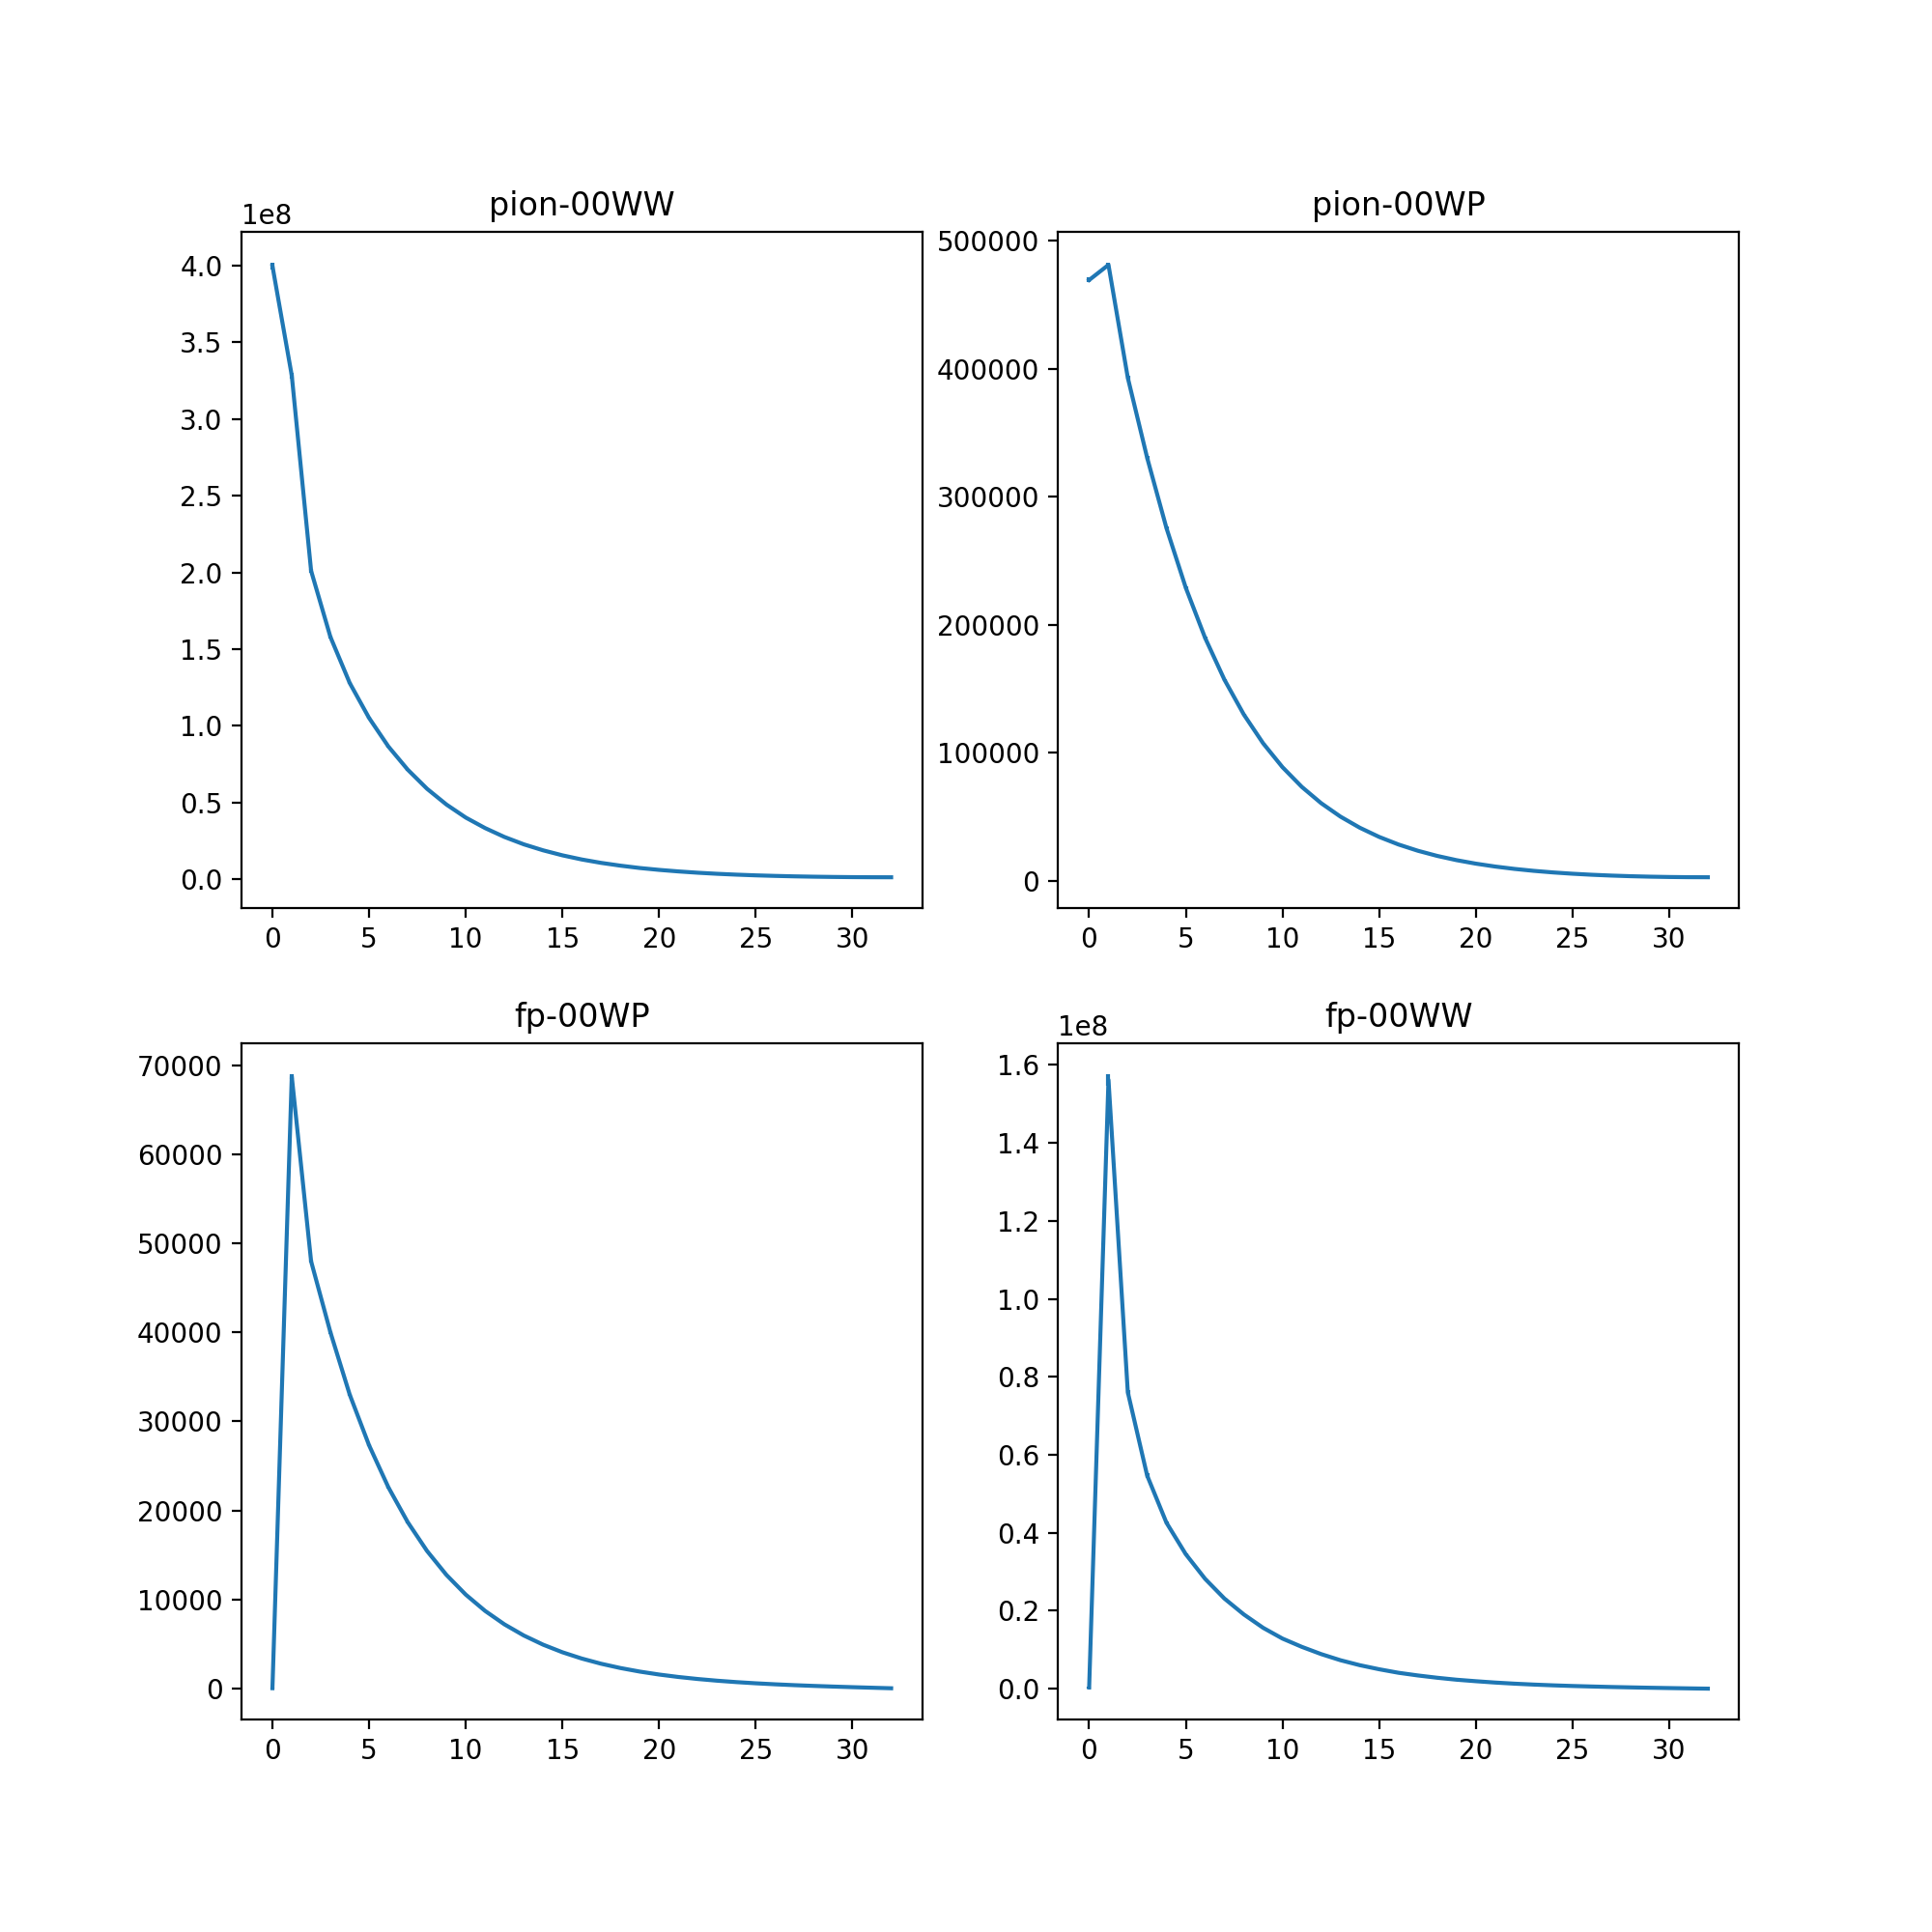

In [6]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
ax = ax.flatten()
for idx in range(len(twopt_fns_folded)):
    C2_i_mu = np.mean(twopt_fns_folded[idx], axis = 0)
    C2_i_sigma = np.std(twopt_fns_folded[idx], axis = 0, ddof = 1)
    ax[idx].errorbar(range(C2_i_mu.shape[0]), C2_i_mu, yerr = C2_i_sigma)
    ax[idx].set_title(labels[idx])

# Compute pion mass

#### pion-00WW

In [7]:
# I've already bootstrapped in the code
# C2_boot = np.real(C2pt_tavg)
# C2_boot_mu = np.mean(C2_boot, axis = 0)
# C2_boot_sigma = np.std(C2_boot, axis = 0, ddof = 1)

In [7]:
# meff_00WW = get_effective_mass(C2_00WW_fold)
# meff_00WW = get_cosh_effective_mass(C2_00WW_fold)
# meff_00WW_mu = np.mean(meff_00WW, axis = 0)
# meff_00WW_sigma = np.std(meff_00WW, axis = 0, ddof = 1)

# fold m_eff over midpoint for a better fit
meff_00WW = get_cosh_effective_mass(C2_boot)
meff_00WW_folded = fold_meff(meff_00WW, T)
meff_00WW_folded_mu = np.mean(meff_00WW_folded, axis = 0)
meff_00WW_folded_sigma = np.std(meff_00WW_folded, axis = 0, ddof = 1)

In [9]:
# meff_00WW_mu = np.mean(meff_00WW, axis = 0)
# meff_00WW_sigma = np.std(meff_00WW, axis = 0, ddof = 1)
# plt.figure()
# plt.errorbar(range(meff_00WW_mu.shape[0]), meff_00WW_mu, yerr = meff_00WW_sigma, fmt = '.', c = 'b')
# plt.show()

In [8]:
# perform fit over all ranges with fit_constant_allrange
fits_00WW, stats_00WW, meff_00WW, weights_00WW = fit_constant_allrange(meff_00WW_folded)

Accepted fits
fit index | fit range | p value | meff mean | meff sigma | weight 
78 range(3, 7) 0.13569613448983459 0.19364940723729326 0.000750212327509723 241101.0400802409
79 range(3, 8) 0.14110628191735974 0.19327768677969612 0.000739260753320578 258196.91418808862
80 range(3, 9) 0.20414016286780023 0.19311442914709645 0.0007362410812811498 376606.97852859047
81 range(3, 10) 0.031402493403992586 0.19253836015289275 0.0006956431808187251 64891.98641654292
82 range(3, 11) 0.04542822269350674 0.19235663879774673 0.0007092760320444441 90301.54426983967
83 range(3, 12) 0.07275892753199291 0.19232867570724568 0.0007019345785880609 147670.25157681105
84 range(3, 13) 0.05773736845305233 0.19204712610913244 0.0006665714113776567 129946.21055797399
85 range(3, 14) 0.08596104474774245 0.1920141127593716 0.0006513185015487282 202635.18398170648
86 range(3, 15) 0.1167128152168922 0.19208573655845845 0.0006352758920114342 289197.0079511229
87 range(3, 16) 0.12124752039013485 0.19188996636700764 

167 range(6, 30) 0.41203823062500605 0.19112614381853382 0.0005715930210504436 1261141.0972218013
168 range(7, 11) 0.35721570412813775 0.19077493122736425 0.0009199742750555547 422064.8414731679
169 range(7, 12) 0.4602802875099351 0.1910194288420505 0.0008631825416599616 617756.1531241664
170 range(7, 13) 0.5435358225409967 0.19078083987015987 0.0007529401183048253 958754.2372652428
171 range(7, 14) 0.6404827966867894 0.19091455380363864 0.000754921644022878 1123838.0062606365
172 range(7, 15) 0.6102425385405801 0.19119038509078995 0.0007181681889726238 1183178.1733355864
173 range(7, 16) 0.6991909643551085 0.19109052030004492 0.0006430460984703176 1690875.3467042958
174 range(7, 17) 0.7319979699103545 0.19097888524223133 0.0006345216361026218 1818096.8143258449
175 range(7, 18) 0.5486608310446892 0.19121733523203022 0.0006312073433671693 1377082.2215509305
176 range(7, 19) 0.36107414155031187 0.19095661828558919 0.0006685972355241547 807731.8987290973
177 range(7, 20) 0.31127749327255

253 range(11, 26) 0.23384853159970917 0.19102232460740318 0.0006367323773493912 576794.0600399771
254 range(11, 27) 0.29337436673009226 0.19101354529756723 0.0005951236195672876 828338.3926545533
255 range(11, 28) 0.35405935246709885 0.1910360495936333 0.000598193011409819 989448.9703070314
256 range(11, 29) 0.4138388019136974 0.19106097821584644 0.0005947538319040885 1169921.4684071196
257 range(11, 30) 0.31974738988600976 0.19115403771009212 0.0005691099512523682 987221.5996284229
258 range(12, 16) 0.5926936039107336 0.1911506812766102 0.0007353867746625219 1095969.8583045215
259 range(12, 17) 0.6522869422399746 0.19094906570156112 0.0007173827032481177 1267467.6463602844
260 range(12, 18) 0.40238945892973255 0.19134523266196457 0.0006805822149001949 868731.1688115785
261 range(12, 19) 0.2097278832490348 0.19092119858482967 0.0007123051313388663 413355.79229120875
262 range(12, 20) 0.18342955082574322 0.1906631556827597 0.0006366939494931855 452488.82396462903
263 range(12, 21) 0.189

338 range(18, 27) 0.17958410067742528 0.19069324611790678 0.0006591165807698751 413374.24082343007
339 range(18, 28) 0.23803865552253256 0.19075913773641123 0.0006591552616341621 547863.0896662207
340 range(18, 29) 0.2993727103496267 0.1908171026163085 0.0006593160870473936 688691.7242300439
341 range(18, 30) 0.19774770759554283 0.19097916540710438 0.0006238685035686424 508072.08783799247
342 range(19, 23) 0.274647945915119 0.19078386290490143 0.0007936412765330319 436041.53651594423
343 range(19, 24) 0.30391304568471456 0.19112131340450855 0.0008139979901983923 458672.4737841477
344 range(19, 25) 0.23898369792298893 0.19067827104795282 0.0006944809378407466 495504.5166337857
345 range(19, 26) 0.19196066369361844 0.19101138397668407 0.0007334125161305081 356874.57503859285
346 range(19, 27) 0.27563442275631445 0.19099580512780365 0.0006031987613310548 757552.2137578223
347 range(19, 28) 0.3635280777382806 0.19104000558972115 0.0006191317932758918 948356.7672702298
348 range(19, 29) 0.4

In [9]:
ampi_pion00WW_bar, ampi_pion00WW_sigma = analyze_accepted_fits(meff_00WW, weights_00WW)
print('meff on pion-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: ' + str(ampi_pion00WW_bar) \
      + ' \pm ' + str(ampi_pion00WW_sigma))

meff on pion-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: 0.191134669605731 \pm 0.0007193493400722331


<IPython.core.display.Javascript object>


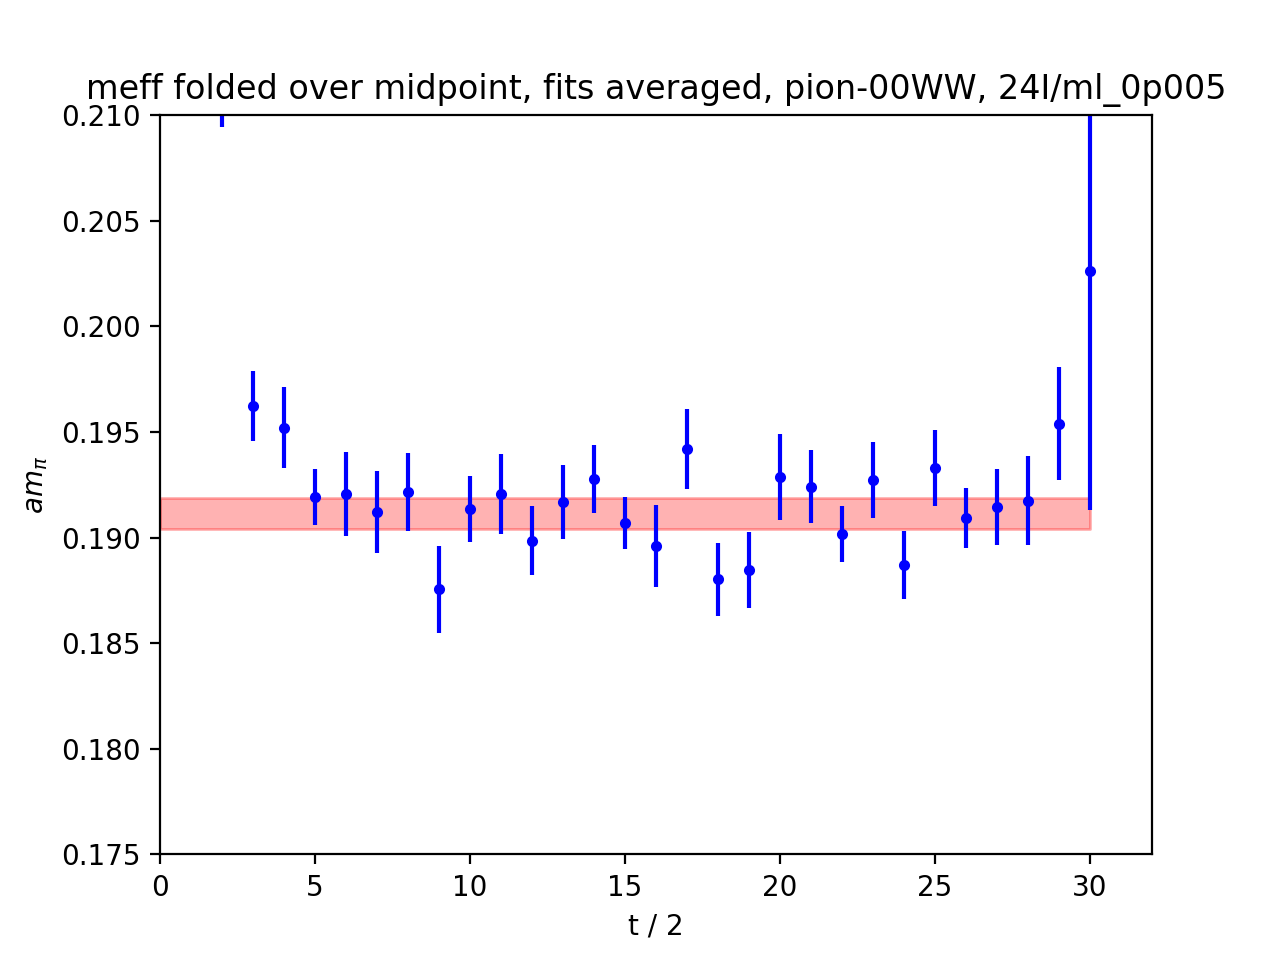

In [10]:
t_range = range(meff_00WW_folded_mu.shape[0])
plt.figure()
plt.errorbar(t_range, meff_00WW_folded_mu, yerr = meff_00WW_folded_sigma, fmt = '.', c = 'b')
plt.fill_between(t_range, ampi_pion00WW_bar - ampi_pion00WW_sigma, ampi_pion00WW_bar + ampi_pion00WW_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
plt.ylim((0.175, 0.21))
plt.title('meff folded over midpoint, fits averaged, pion-00WW, ' + config)
plt.xlabel('t / 2')
plt.ylabel('$a m_{\\pi}$')
plt.show()

#### pion-00WP

In [11]:
# get effective mass for pion-00WP
meff_00WP = get_cosh_effective_mass(C2_pion00WP)
meff_00WP_folded = fold_meff(meff_00WP, T)

meff_00WP_folded_mu = np.mean(meff_00WP_folded, axis = 0)
meff_00WP_folded_sigma = np.std(meff_00WP_folded, axis = 0, ddof = 1)

In [12]:
fits_00WP, stats_00WP, meff_00WP, weights_00WP = fit_constant_allrange(meff_00WP_folded)

Accepted fits
fit index | fit range | p value | meff mean | meff sigma | weight 
125 range(5, 9) 0.1067085445268165 0.19001009996114543 0.0005556676826382727 345596.16770478094
126 range(5, 10) 0.08462973627246966 0.19017915322409365 0.0005612268536324987 268686.65799352655
127 range(5, 11) 0.09089492626149653 0.19028749871402936 0.0005677882092047358 281946.62634562096
128 range(5, 12) 0.09868939850479903 0.19037959347743802 0.0005706789211150826 303030.8464813477
129 range(5, 13) 0.12375577736279476 0.1904431297221744 0.0005691125413898533 382093.0781033864
130 range(5, 14) 0.15318432431921347 0.19049825218876174 0.0005623429564061217 484408.55637513037
131 range(5, 15) 0.1869224640714564 0.1905431345684246 0.0005578887789971681 600573.6097421192
132 range(5, 16) 0.23595132760556373 0.19057266229502814 0.0005557393490936781 763976.7274779215
133 range(5, 17) 0.29684633746563055 0.190593105234165 0.0005550265319087829 963616.4528179575
134 range(5, 18) 0.3679346406715233 0.19060585876

216 range(9, 22) 0.9999995915027071 0.19093454464789505 0.000588356770916126 2888805.5585527425
217 range(9, 23) 0.9999993114903467 0.19095355193980473 0.0005915710513748318 2857497.596910584
218 range(9, 24) 0.9999984145017723 0.19097579982234417 0.0005933678952315252 2840215.03495809
219 range(9, 25) 0.9999992077854492 0.1909882315186044 0.0005944377953349989 2830002.5468518063
220 range(9, 26) 0.9999997232764694 0.19099627661042753 0.0005938861798554261 2835263.5960023683
221 range(9, 27) 0.9999998994243692 0.19100445109121103 0.0005936185810370657 2837820.9033081257
222 range(9, 28) 0.9999997787273017 0.19102476012926917 0.0005942352627371029 2831933.586224431
223 range(9, 29) 0.999985554966662 0.1910619875545562 0.0005956999638977161 2817984.363779876
224 range(9, 30) 0.9979884477612607 0.1911122149698037 0.0005971474204183351 2798738.9571056
225 range(10, 14) 0.9991598417541551 0.19096467075229165 0.0006133146419987111 2656246.068647191
226 range(10, 15) 0.9999408301886528 0.1909

314 range(16, 22) 0.9933458172180039 0.19089900820060066 0.0006267325635902823 2528924.983714573
315 range(16, 23) 0.9941776095115495 0.19094275871598027 0.000633636183777426 2476190.417286495
316 range(16, 24) 0.9943379571610282 0.19098790984021874 0.0006362005502139258 2456664.9940350554
317 range(16, 25) 0.9973884064861863 0.19101004813275227 0.0006366664219745251 2460596.627918746
318 range(16, 26) 0.9990144633607784 0.19102225174678192 0.0006339852006209362 2485498.673291984
319 range(16, 27) 0.9996323880565507 0.1910339210166897 0.0006314392625828853 2507131.731589595
320 range(16, 28) 0.999630901219164 0.19106532883575164 0.0006306634865773016 2513299.807414308
321 range(16, 29) 0.996843686502559 0.19112272629718338 0.0006318846627665862 2496614.1877893764
322 range(16, 30) 0.9511956484140569 0.19119888345651018 0.0006338122868815543 2367819.2485573753
323 range(17, 21) 0.9631906621874959 0.1908601277253369 0.0006271523912120805 2448872.073394326
324 range(17, 22) 0.978007883348

In [13]:
ampi_pion00WP_bar, ampi_pion00WP_sigma = analyze_accepted_fits(meff_00WP, weights_00WP)
print('meff on pion-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: ' + str(ampi_pion00WP_bar) \
      + ' \pm ' + str(ampi_pion00WP_sigma))

meff on pion-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: 0.1909827048161535 \pm 0.0006320679646395113


<IPython.core.display.Javascript object>


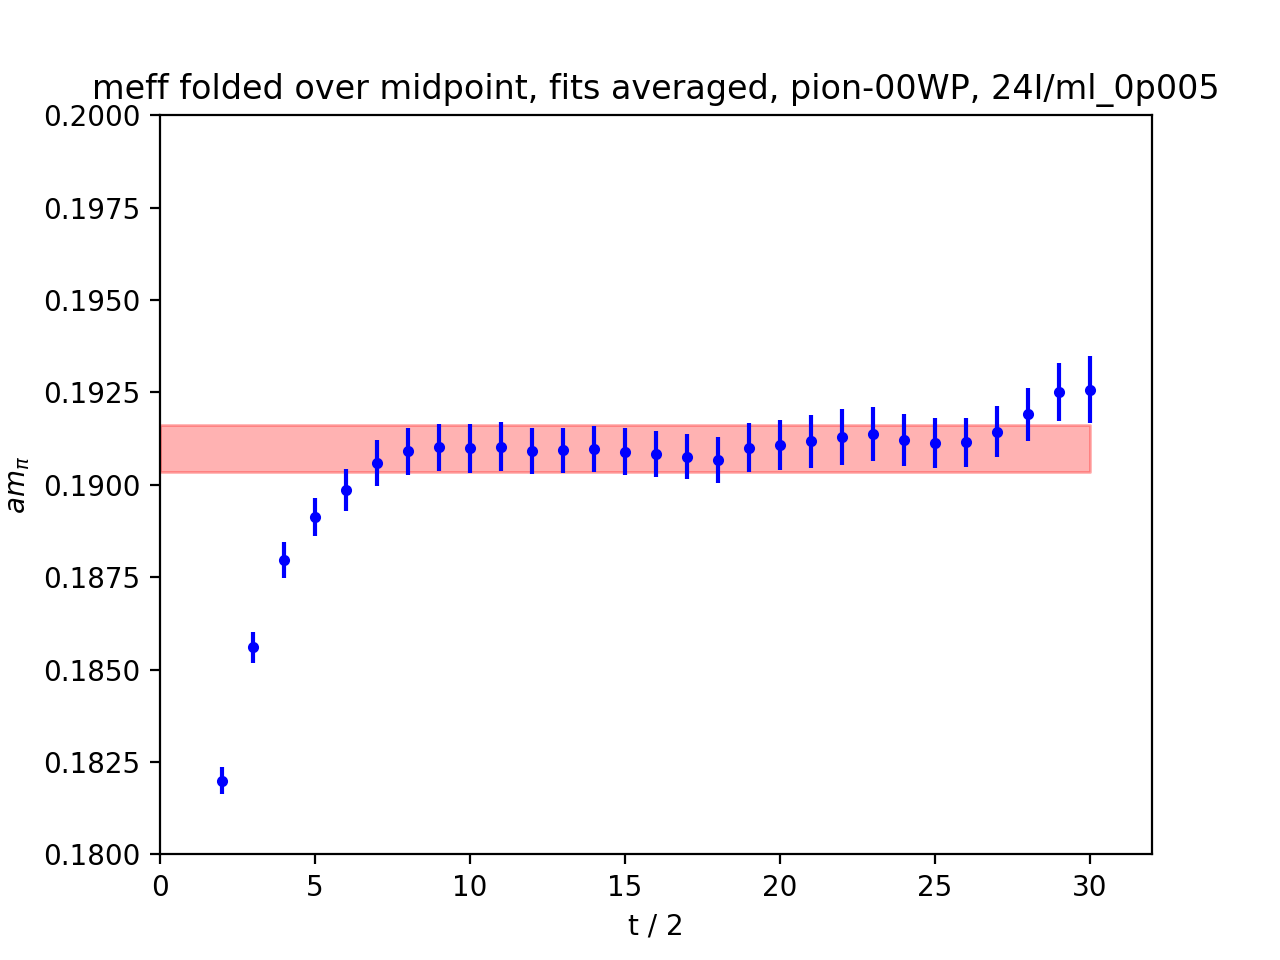

In [14]:
plt.figure()
plt.errorbar(t_range, meff_00WP_folded_mu, yerr = meff_00WP_folded_sigma, fmt = '.', c = 'b')
plt.fill_between(t_range, ampi_pion00WP_bar - ampi_pion00WP_sigma, ampi_pion00WP_bar + ampi_pion00WP_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
plt.ylim((0.18, 0.2))
plt.title('meff folded over midpoint, fits averaged, pion-00WP, ' + config)
plt.xlabel('t / 2')
plt.ylabel('$a m_{\\pi}$')
plt.show()

#### fp-00WP

In [15]:
meff_fpWP = get_sinh_effective_mass(C2_fpWP)
# meff_fpWP = get_effective_mass(C2_fpWP)
meff_fpWP_folded = fold_meff(meff_fpWP, T)

meff_fpWP_folded_mu = np.mean(meff_fpWP_folded, axis = 0)
meff_fpWP_folded_sigma = np.std(meff_fpWP_folded, axis = 0, ddof = 1)

/Users/theoares/lqcd/0nubb/python_scripts/utils.py:491: RuntimeWarning: overflow encountered in sinh
  m = optimize.root(lambda m : ratios[ens_idx, t] - np.sinh(m * (t - TT / 2)) / np.sinh(m * (t + 1 - TT / 2)), \
/Users/theoares/lqcd/0nubb/python_scripts/utils.py:491: RuntimeWarning: invalid value encountered in true_divide
  m = optimize.root(lambda m : ratios[ens_idx, t] - np.sinh(m * (t - TT / 2)) / np.sinh(m * (t + 1 - TT / 2)), \
/Users/theoares/lqcd/0nubb/python_scripts/utils.py:491: RuntimeWarning: divide by zero encountered in true_divide
  m = optimize.root(lambda m : ratios[ens_idx, t] - np.sinh(m * (t - TT / 2)) / np.sinh(m * (t + 1 - TT / 2)), \


In [16]:
fits_fpWP, stats_fpWP, meff_fpWP, weights_fpWP = fit_constant_allrange(meff_fpWP_folded)

Accepted fits
fit index | fit range | p value | meff mean | meff sigma | weight 
63 range(2, 16) 0.013617362111387676 0.19088897360170484 0.0005561723920901329 44022.4422284107
64 range(2, 17) 0.020706398930497492 0.19089706550966334 0.0005564528621789403 66872.53946207144
65 range(2, 18) 0.030624585268497113 0.19090146707557681 0.0005596184120380948 97788.14918315296
66 range(2, 19) 0.04081144177822407 0.19091887437496866 0.0005605113362637766 129901.19209370473
67 range(2, 20) 0.04794797114989761 0.19094475882374393 0.0005618431187764903 151893.81951698315
68 range(2, 21) 0.06450567422291639 0.1909528805385792 0.0005648351835762943 202187.56256436283
69 range(2, 22) 0.08196588574292983 0.19096488004250348 0.0005685266412758278 253589.6329390584
70 range(2, 23) 0.1051768811159244 0.19097260747820538 0.0005724180407763882 320991.596266833
71 range(2, 24) 0.12931919672554565 0.19098410852956385 0.0005740068371034949 392490.24527825793
72 range(2, 25) 0.162657295399141 0.1909866868727296

151 range(6, 14) 0.9993847815137726 0.190946581286819 0.0005891890091561016 2878879.3073044154
152 range(6, 15) 0.9998329701457737 0.1909543334897042 0.0005941881308726123 2831910.404329506
153 range(6, 16) 0.9999601070890045 0.19095132535608828 0.0005900722377213803 2871919.8166880673
154 range(6, 17) 0.9999900795048987 0.1909576505695388 0.0005887066589249309 2885345.306252109
155 range(6, 18) 0.999997797088307 0.19096004212730977 0.0005920629029992263 2852747.561203067
156 range(6, 19) 0.9999973456193731 0.19098075785308632 0.0005919914408533322 2853435.052404162
157 range(6, 20) 0.9999834017796029 0.19101281835308317 0.0005929058962507735 2844600.3089114036
158 range(6, 21) 0.9999939122540545 0.19102059791665876 0.0005958352844983962 2816728.060371898
159 range(6, 22) 0.9999961901281825 0.19103394948397148 0.0006002419140556104 2775528.6123274253
160 range(6, 23) 0.9999985220930524 0.19104147256131665 0.000604477972123401 2736770.624033589
161 range(6, 24) 0.9999991703087772 0.1910

251 range(11, 24) 0.9999909193205411 0.1911193151538078 0.0006347046268527962 2482291.200944809
252 range(11, 25) 0.9999974918186606 0.19111466806016586 0.0006343886274344065 2484781.088330368
253 range(11, 26) 0.9999993209349395 0.191118658422546 0.0006381052727091516 2455924.652685166
254 range(11, 27) 0.9999979888288958 0.19113933428614094 0.0006429305749511966 2419195.510029753
255 range(11, 28) 0.9987790838260816 0.19120548727832268 0.0006284415373415665 2528946.687876329
256 range(11, 29) 0.9936940276875491 0.19123115423649062 0.0006294538257459923 2507984.9420858077
257 range(11, 30) 0.9711934821788524 0.1912217130773714 0.0006308085101738689 2440679.040820405
258 range(12, 16) 0.9889822025740338 0.19096896223058799 0.0006131737656533069 2630397.27071698
259 range(12, 17) 0.9980259953107936 0.1909795515125955 0.0006099307013441988 2682754.0826513213
260 range(12, 18) 0.9996978457182715 0.19098151036409333 0.0006174656537252365 2622063.1431560493
261 range(12, 19) 0.9995615538354

338 range(18, 27) 0.9998954623592572 0.1912848615196345 0.0006928346002026207 2083029.694348351
339 range(18, 28) 0.9820759172103772 0.19139560796161725 0.0006639877329025791 2227537.1176560214
340 range(18, 29) 0.949615955610231 0.19143932290923937 0.0006649121701978583 2147926.6123811216
341 range(18, 30) 0.8289560837584176 0.191421028879463 0.0006666127358923348 1865452.992221613
342 range(19, 23) 0.9898895302580084 0.19130799900231896 0.0007099987284036697 1963683.9436891775
343 range(19, 24) 0.998389513603243 0.19130733828902513 0.0007038682303473814 2015195.960757266
344 range(19, 25) 0.9987187224878347 0.19125977752430473 0.000691070185605013 2091215.9259700107
345 range(19, 26) 0.9997382503716253 0.19125143426091495 0.0006933069828860127 2079865.0636614142
346 range(19, 27) 0.9995571517346298 0.19128863979959668 0.0007041853761102835 2015735.8844798761
347 range(19, 28) 0.9659457868757989 0.19141417827805682 0.0006717075409932464 2140879.8994560046
348 range(19, 29) 0.920079604

In [17]:
ampi_fpWP_bar, ampi_fpWP_sigma = analyze_accepted_fits(meff_fpWP, weights_fpWP)
print('meff on fp-00WP, avg over all fit ranges with cut ϵ = 0.01 on pvals: ' + str(ampi_fpWP_bar) \
      + ' \pm ' + str(ampi_fpWP_sigma))

meff on fp-00WP, avg over all fit ranges with cut ϵ = 0.01 on pvals: 0.19106737154327041 \pm 0.000650266539640436


<IPython.core.display.Javascript object>


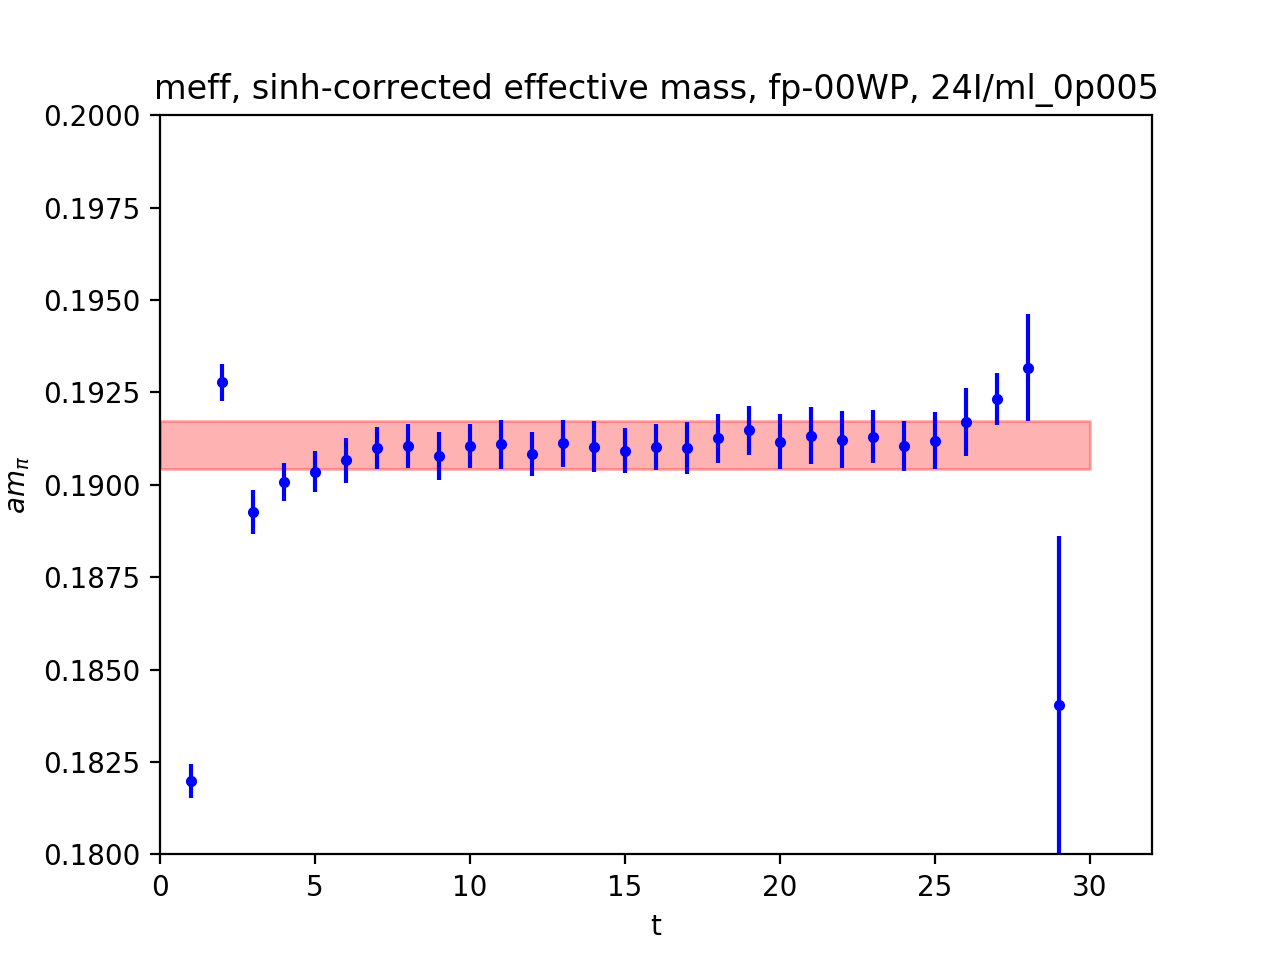

In [18]:
plt.figure()
plt.errorbar(range(meff_00WP_folded.shape[1]), meff_fpWP_folded_mu, yerr = meff_fpWP_folded_sigma, fmt = '.', c = 'b')
plt.fill_between(t_range, ampi_fpWP_bar - ampi_fpWP_sigma, ampi_fpWP_bar + ampi_fpWP_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
plt.ylim((0.18, 0.20))
plt.title('meff, sinh-corrected effective mass, fp-00WP, ' + config)
plt.xlabel('t')
plt.ylabel('$a m_{\\pi}$')
plt.show()

#### fp-00WW

In [19]:
# get effective mass for pion-00WP
# meff_fpWW = get_cosh_effective_mass(C2_fpWW)
meff_fpWW = get_sinh_effective_mass(C2_fpWW)
meff_fpWW_folded = fold_meff(meff_fpWW, T)

meff_fpWW_folded_mu = np.mean(meff_fpWW_folded, axis = 0)
meff_fpWW_folded_sigma = np.std(meff_fpWW_folded, axis = 0, ddof = 1)

In [20]:
fits_fpWW, stats_fpWW, meff_fpWW, weights_fpWW = fit_constant_allrange(meff_fpWW_folded)

Accepted fits
fit index | fit range | p value | meff mean | meff sigma | weight 
78 range(3, 7) 0.02211973207906629 0.20144989630977173 0.0014173347977321502 11011.207903463
79 range(3, 8) 0.04349802938475595 0.20108329721849066 0.001397779571778742 22263.436650927804
80 range(3, 9) 0.03503870602559913 0.20001843548956477 0.0012529166253259796 22320.48952908505
102 range(4, 8) 0.588281520732933 0.1982205967175786 0.001608788050226344 227293.77566431847
103 range(4, 9) 0.6233253824818987 0.19744837229077036 0.0013024804633859695 367428.108099282
106 range(4, 12) 0.014270636395629364 0.1940075520637006 0.001008119714961904 14041.68172439226
107 range(4, 13) 0.022788763949412545 0.19373772902197695 0.0010213687088010519 21845.182286808824
108 range(4, 14) 0.02319760397230156 0.19305554135470662 0.0008607470128630729 31310.649853954917
109 range(4, 15) 0.015367764725676056 0.19378413121855564 0.0008091301767854284 23473.28683716284
125 range(5, 9) 0.7117142894230761 0.19657926955179728 0.0

242 range(11, 15) 0.21349420668784544 0.19366147502374984 0.0014040245940915958 108302.04668607388
243 range(11, 16) 0.03301768829739733 0.19161653991843824 0.0012317362881516137 21762.62058710261
244 range(11, 17) 0.05908258325694479 0.1913343046560489 0.0012958827633175747 35182.60958227893
245 range(11, 18) 0.0747232531043922 0.19175514200152524 0.0010734762751469509 64844.160146082366
246 range(11, 19) 0.019434731464106916 0.19088340669646095 0.001114352211755893 15650.69346594245
247 range(11, 20) 0.02325786745751634 0.1912598742527447 0.0009396338953038866 26342.230277856263
248 range(11, 21) 0.03552444481370067 0.1914229131143092 0.0009333442654872997 40779.65735713801
249 range(11, 22) 0.0552819484337499 0.19146381074422372 0.0009596318420329465 60030.787605894955
250 range(11, 23) 0.07903884039903418 0.19138087572210571 0.0009114972468767998 95132.70321895245
251 range(11, 24) 0.11108587936463081 0.1914247388574095 0.0008462535028881689 155116.46487420087
252 range(11, 25) 0.0

339 range(18, 28) 0.03785452390568586 0.19044116935674166 0.0011850324885673497 26956.11338139291
340 range(18, 29) 0.04513212913665043 0.1903408838231427 0.001207748945813583 30940.867638958985
341 range(18, 30) 0.06793869655145152 0.1903414940920809 0.0012044395922404865 46832.48083319584
342 range(19, 23) 0.8338934962831692 0.19303776666318093 0.001601282359280044 325218.12996926624
343 range(19, 24) 0.9294721802529605 0.19301800220072973 0.0014283325385511575 455593.7270965209
344 range(19, 25) 0.24864848310418963 0.19106438623309543 0.0012501879624749201 159087.18171689456
345 range(19, 26) 0.13983636750425787 0.19202918364360644 0.0011047138673244646 114583.0880670001
346 range(19, 27) 0.17211456380294682 0.19180273452703772 0.001053375200821148 155114.1584868594
347 range(19, 28) 0.12870248988757957 0.19228187191045326 0.0011299740550593362 100797.55669316843
348 range(19, 29) 0.14149290669686684 0.19215904852567842 0.001124979444572983 111800.95005332063
349 range(19, 30) 0.197

In [21]:
ampi_pionfpWW_bar, ampi_pionfpWW_sigma = analyze_accepted_fits(meff_fpWW, weights_fpWW)
print('meff on fp-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: ' + str(ampi_pionfpWW_bar) \
      + ' \pm ' + str(ampi_pionfpWW_sigma))

meff on fp-00WW, avg over all fit ranges with cut ϵ = 0.01 on pvals: 0.19170321313268163 \pm 0.0023380167588839783


<IPython.core.display.Javascript object>


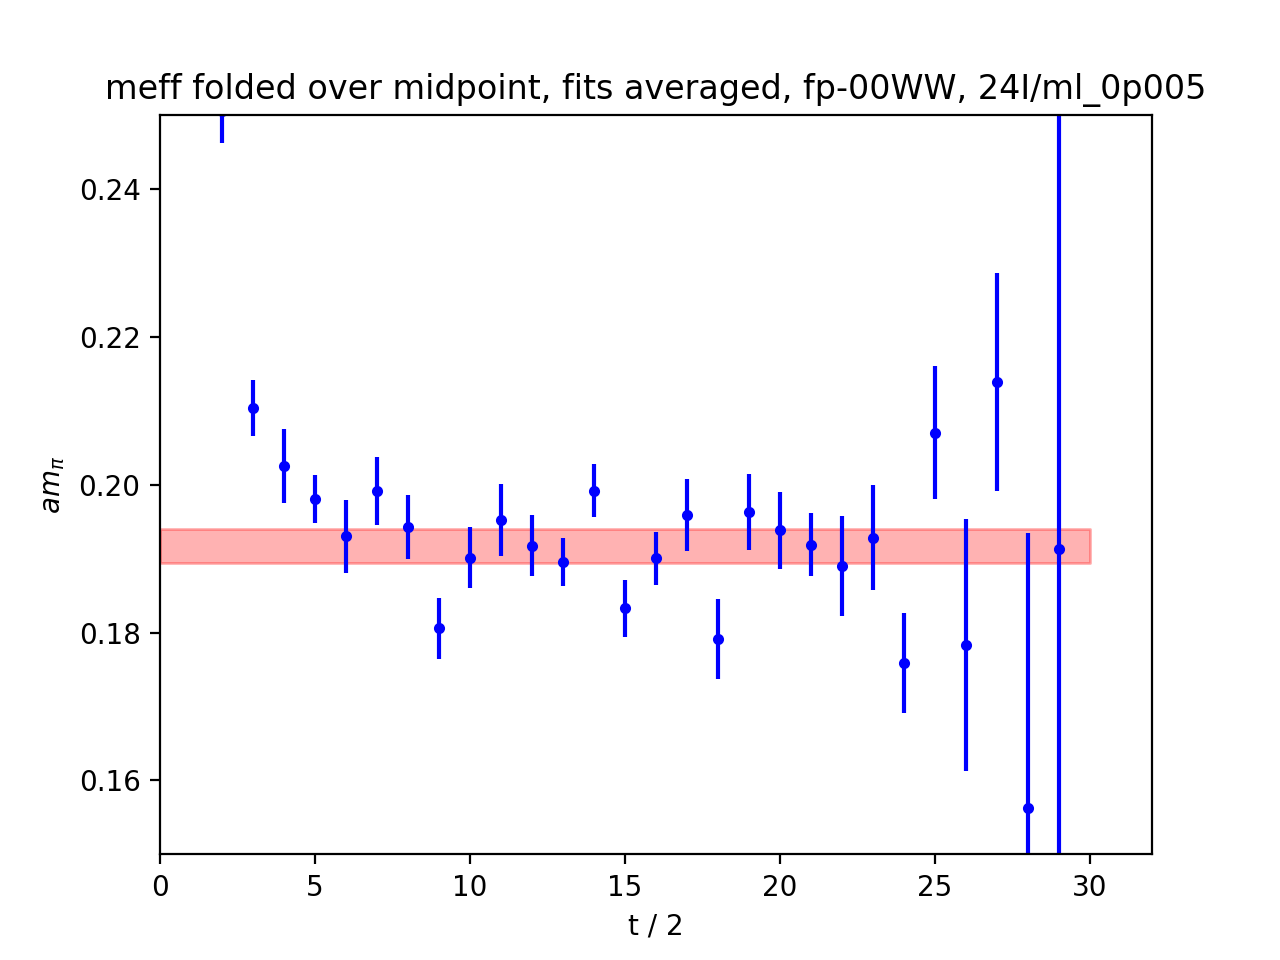

In [22]:
plt.figure()
plt.errorbar(t_range, meff_fpWW_folded_mu, yerr = meff_fpWW_folded_sigma, fmt = '.', c = 'b')
plt.fill_between(t_range, ampi_pionfpWW_bar - ampi_pionfpWW_sigma, ampi_pionfpWW_bar + ampi_pionfpWW_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
plt.ylim((0.15, 0.25))
plt.title('meff folded over midpoint, fits averaged, fp-00WW, ' + config)
plt.xlabel('t / 2')
plt.ylabel('$a m_{\\pi}$')
plt.show()

#### Simultaneous fit for pion-00WP, pion-00WW, fp-00WP

In [23]:
meff_all = np.concatenate((meff_00WW, meff_00WP, meff_fpWP, meff_fpWW), axis = 0)
weights_all = np.concatenate((weights_00WW, weights_00WP, weights_fpWP, weights_fpWW), axis = 0)
meff_mu_all, meff_sigma_all = analyze_accepted_fits(meff_all, weights_all)

In [24]:
print('Average over all fits for all stems: ampi = ' + str(meff_mu_all) + ' \pm ' + str(meff_sigma_all))

Average over all fits for all stems: ampi = 0.19104891946663238 \pm 0.000688295580174702


In [25]:
# average over boostraps to see if the error is similar
meff_boots = weighted_sum_bootstrap(meff_all, weights_all)
meff_boots_mu = np.mean(meff_boots)
meff_boots_sigma = np.std(meff_boots, ddof = 1)

In [26]:
print('Average over bootstrapped samples: ' + str(meff_boots_mu) + ' \pm ' + str(meff_boots_sigma))

Average over bootstrapped samples: 0.19104891946663233 \pm 0.0005914961967816857


# Compute ratio of renormalization coefficients

In [34]:
# read in bootstrapped, t-averaged curly A and A data and construct ratio. C2_A[t] is evaluated at t - 1/2
C2_curlyA = np.real(f['za_curlyA'][()])
C2_A = np.real(f['za_A'][()])
# C2_A = np.real(f['za_curlyA'][()])
# C2_curlyA = np.real(f['za_A'][()])
Zratio_boot = (C2_curlyA + np.roll(C2_curlyA, +1, axis = 1))/(4.0*C2_A)+C2_curlyA/(C2_A + np.roll(C2_A, -1, axis = 1))
Zratio_boot_mu = np.mean(Zratio_boot, axis = 0)
Zratio_boot_sigma = np.std(Zratio_boot, axis = 0, ddof = 1)

In [38]:
Z_fits, Z_stats, Z_ens, Z_weights = fit_constant_allrange(Zratio_boot)
Zratio_mu, Zratio_sigma = analyze_accepted_fits(Z_ens, Z_weights)

Accepted fits
fit index | fit range | p value | meff mean | meff sigma | weight 
290 range(5, 9) 0.925268105118192 0.716910594061775 0.0001321040408854793 53019470.6349335
291 range(5, 10) 0.9761639381738728 0.716914925012018 0.00010313962308241573 91763861.29897542
292 range(5, 11) 0.9925009878603114 0.7169242739819783 0.00010405987920655093 91656720.2508468
293 range(5, 12) 0.29401897066960087 0.7170905196071884 9.07757399602798e-05 35680896.46793221
294 range(5, 13) 0.39633525558844745 0.7170839759841013 8.779134641229565e-05 51423222.290718555
295 range(5, 14) 0.49757276184354116 0.7170748469486591 8.171432502687169e-05 74517830.55095297
296 range(5, 15) 0.1912615642509358 0.7171651204692064 7.986610284457555e-05 29984907.763264965
297 range(5, 16) 0.2149423009602984 0.7171303787555062 8.003921108597362e-05 33551836.36618544
298 range(5, 17) 0.2812424496018057 0.7171359670006008 8.552370975514539e-05 38451015.138488226
299 range(5, 18) 0.2262881127200653 0.7171873010749524 8.829585

378 range(6, 43) 0.12054116566780486 0.7172557720051804 7.268079664500557e-05 22818969.563693617
379 range(6, 44) 0.12791980604421013 0.717264487342783 7.207458893644043e-05 24624841.507983472
380 range(6, 45) 0.15102327139139443 0.7172617217043669 7.22185638429297e-05 28956507.40305416
381 range(6, 46) 0.11970113232131264 0.7172390502466922 6.864768814748466e-05 25400743.35967641
382 range(6, 47) 0.13588058460976565 0.7172448559140121 6.705943379348178e-05 30216046.64787448
383 range(6, 48) 0.14356868157535219 0.7172371253630097 6.750391028952904e-05 31506622.571500465
384 range(6, 49) 0.16420823567254605 0.7172314161770059 6.915651925044318e-05 34334338.29553043
385 range(6, 50) 0.18383545493626174 0.7172360627170229 6.705173450740511e-05 40889259.03707963
386 range(6, 51) 0.2007406960553289 0.7172420379246014 6.617280625975852e-05 45843347.28811281
387 range(6, 52) 0.20383438865077833 0.7172510225685528 6.598700932402498e-05 46812362.98218505
388 range(6, 53) 0.23201545821231268 0.7

471 range(8, 31) 0.10503866963194487 0.7172617987959125 8.178238249870633e-05 15704701.851044627
472 range(8, 32) 0.13098931546851225 0.7172665697230087 8.280813220931234e-05 19102486.202170856
473 range(8, 33) 0.11473869378222627 0.7172386868408752 8.115933093996266e-05 17419391.70594681
474 range(8, 34) 0.14301556000603957 0.7172366060144231 8.257075273887937e-05 20976392.63268633
475 range(8, 35) 0.08111119121937099 0.7172630365838312 7.768877636868979e-05 13438915.314918373
476 range(8, 36) 0.07796199739216396 0.7172475405134087 8.02271915995777e-05 12112666.999056203
477 range(8, 37) 0.09773902561700837 0.7172448312667896 7.78909572747725e-05 16109939.98342263
478 range(8, 38) 0.11900781766041962 0.7172490543637571 7.456483471263168e-05 21404612.614028107
479 range(8, 39) 0.11804924648280547 0.7172349492757049 7.492188994021048e-05 21030314.674405586
480 range(8, 40) 0.14398801481300455 0.7172368465558085 7.46372792898926e-05 25847273.850897707
481 range(8, 41) 0.13801430711207105

568 range(10, 27) 0.15047740726500208 0.717360888034632 9.035849140859373e-05 18430340.40800541
569 range(10, 28) 0.18741197211370014 0.7173508737570112 8.724354437860882e-05 24622419.63719311
570 range(10, 29) 0.05874144418623231 0.7172927728295179 8.685217154833297e-05 7787234.565996367
571 range(10, 30) 0.07600932129327981 0.717284474338721 8.795234126661664e-05 9825893.33034018
572 range(10, 31) 0.09351710260679619 0.717296303736899 8.727613439543069e-05 12277219.996401208
573 range(10, 32) 0.11974020263292612 0.7173001212581973 8.917239384500952e-05 15058410.698075878
574 range(10, 33) 0.09802494966672616 0.7172672573071772 8.676003248852319e-05 13022585.456575798
575 range(10, 34) 0.12387053677853127 0.7172640358299374 8.833835020794039e-05 15873381.390335673
576 range(10, 35) 0.07211805656681058 0.7172917384860296 8.241771740576237e-05 10617025.247060053
577 range(10, 36) 0.06701591606518827 0.7172740032448773 8.563042753593056e-05 9139485.196673973
578 range(10, 37) 0.084832496

670 range(12, 32) 0.16975868013556342 0.7172789314173826 9.20265656310151e-05 20044976.915931355
671 range(12, 33) 0.14536954090677148 0.7172445653216526 8.916543931519612e-05 18284383.07349812
672 range(12, 34) 0.18172341597242947 0.7172418848764319 9.089748297102635e-05 21994149.72208086
673 range(12, 35) 0.10304112603543199 0.7172729275397234 8.523443721308977e-05 14183401.60411367
674 range(12, 36) 0.09787224356089962 0.7172543338069473 8.888065205924066e-05 12389251.802816631
675 range(12, 37) 0.1231072420918937 0.717250911391151 8.613291895027813e-05 16593777.851068407
676 range(12, 38) 0.1505007089900153 0.7172555908876397 8.132628219155009e-05 22754993.0730836
677 range(12, 39) 0.14819179185171877 0.7172390420111167 8.385649937408174e-05 21074180.334280312
678 range(12, 40) 0.18086246047690152 0.717240958304804 8.126378808827229e-05 27387620.96748908
679 range(12, 41) 0.1743531746209938 0.7172618119930441 7.732468676961295e-05 29160402.925542686
680 range(12, 42) 0.192409660745

764 range(14, 33) 0.10015950877761819 0.7172636424696354 9.067381829808323e-05 12182274.389497083
765 range(14, 34) 0.12942768674055843 0.7172600004680462 9.20830504422077e-05 15263980.1846855
766 range(14, 35) 0.07248207876805765 0.7172926245927765 8.594329433871571e-05 9813109.537394304
767 range(14, 36) 0.06737319259978948 0.7172719252394034 8.957436157499014e-05 8396913.602680221
768 range(14, 37) 0.08703970452468755 0.7172675135131046 8.659401914591834e-05 11607578.072984802
769 range(14, 38) 0.11002680824515537 0.71727188043302 8.183846336782517e-05 16427957.935811458
770 range(14, 39) 0.10689271991791147 0.7172536189541195 8.437370456279995e-05 15015295.797990281
771 range(14, 40) 0.13433222933549455 0.717254665138793 8.166907303451113e-05 20140255.220689632
772 range(14, 41) 0.13259067157565438 0.7172757375971881 7.825179043119009e-05 21653315.50894813
773 range(14, 42) 0.14730789546213463 0.7172669260714841 7.72541303998088e-05 24682128.46040363
774 range(14, 43) 0.09636443965

860 range(16, 40) 0.22176989995124788 0.7172455696834079 8.515727889539453e-05 30581518.72588181
861 range(16, 41) 0.21509643424536418 0.7172688563082312 8.13407349402783e-05 32510004.288407873
862 range(16, 42) 0.23622295361373485 0.7172596155966605 8.060523822655062e-05 36357629.83523198
863 range(16, 43) 0.15668045477384374 0.7172877967475796 8.11453481434984e-05 23795101.830321323
864 range(16, 44) 0.17143798494835807 0.7172982679365902 8.045664348063805e-05 26483978.84648005
865 range(16, 45) 0.20243185878661535 0.7172934475245388 7.982736245248279e-05 31766934.142204333
866 range(16, 46) 0.14826364938131445 0.7172618204775364 7.329301468566625e-05 27600027.50143575
867 range(16, 47) 0.1722192574427013 0.7172683702658033 7.185907854395307e-05 33351734.473967005
868 range(16, 48) 0.17938808502791045 0.7172577906132139 7.19044059247505e-05 34696254.026908964
869 range(16, 49) 0.2044289512280608 0.7172493306837653 7.393723822493539e-05 37395207.88741098
870 range(16, 50) 0.2320162513

969 range(19, 23) 0.5278652116030527 0.7172600229249869 0.0001709270225768143 18067646.548977993
970 range(19, 24) 0.624110617053067 0.7172065739638478 0.00014349466365496018 30310288.45012639
971 range(19, 25) 0.11764729879279838 0.7173743079584498 0.00014438756134727614 5643160.434065447
972 range(19, 26) 0.1560993093419272 0.7173270738176665 0.00013200959066137755 8957565.91752135
973 range(19, 27) 0.1524505752126471 0.7173888003587754 0.000110857441289818 12405074.207497623
974 range(19, 28) 0.20755356041360074 0.7173646912389909 0.00010814416478435505 17746961.45453924
975 range(19, 29) 0.04881493398851624 0.717253790800311 0.00010587626551322942 4354672.287585428
976 range(19, 30) 0.07229690674705042 0.7172422985404205 0.00010570285789365547 6470625.385161133
977 range(19, 31) 0.09300440543439058 0.717266970075288 0.00010563393848098492 8334826.729946295
978 range(19, 32) 0.1277179199460165 0.7172753456172458 0.00010609450186340595 11346608.772821728
979 range(19, 33) 0.110179460

1061 range(21, 36) 0.03725444936692766 0.7172481435560126 9.536950142991127e-05 4095992.2313948954
1062 range(21, 37) 0.053008422430721173 0.7172433094917392 9.3435592609877e-05 6071838.207212023
1063 range(21, 38) 0.07171638603706951 0.7172506860354769 8.304304795312942e-05 10399485.042690145
1064 range(21, 39) 0.0731173103059138 0.7172267628207988 8.345130160113076e-05 10499146.05822423
1065 range(21, 40) 0.09761049754506233 0.7172305940921981 8.311681773839103e-05 14129237.070081938
1066 range(21, 41) 0.09386676213401378 0.7172603713952417 7.890558224047071e-05 15076355.8564064
1067 range(21, 42) 0.10928996897832913 0.7172494308569536 7.955956017961509e-05 17266151.827312518
1068 range(21, 43) 0.06448028286347367 0.7172838919053828 7.86007510504647e-05 10436948.542539626
1069 range(21, 44) 0.07367337464504374 0.7172965418415467 7.79888715206522e-05 12112820.76265029
1070 range(21, 45) 0.09298829949967427 0.7172909074755678 7.795207277042383e-05 15302872.869767798
1071 range(21, 46) 

1168 range(24, 32) 0.039098757227479485 0.7173142583093725 0.0001138843039185546 3014638.2835860103
1169 range(24, 33) 0.03222313125460209 0.7172350957727168 0.00010852437356590784 2735981.5539285815
1170 range(24, 34) 0.05154798971792474 0.7172303361891119 0.00010902835783144799 4336434.505608245
1171 range(24, 35) 0.022718632822233187 0.7172921558443589 9.784692988526412e-05 2372945.619161848
1172 range(24, 36) 0.022335103094015013 0.71725554825907 0.00010499548152720616 2026034.060263423
1173 range(24, 37) 0.03406598996917596 0.7172491804787721 0.00010091224908277688 3345285.9224739783
1174 range(24, 38) 0.049081967902500266 0.7172576175589644 9.08248875464867e-05 5949935.111625059
1175 range(24, 39) 0.05070429981775942 0.7172289139231977 9.42902291079745e-05 5703105.530674637
1176 range(24, 40) 0.07124101421547858 0.7172331324535183 8.883497160211983e-05 9027389.01748531
1177 range(24, 41) 0.0697943327462324 0.7172669660024654 8.369638489047616e-05 9963381.501175636
1178 range(24, 

1280 range(27, 42) 0.3117600945110985 0.7171837892513127 8.816824917207498e-05 40104775.62780802
1281 range(27, 43) 0.16153646465576588 0.7172328988444937 8.485214620843827e-05 22435973.095631152
1282 range(27, 44) 0.17328381992733322 0.7172518658253615 8.447492396219886e-05 24283003.030961204
1283 range(27, 45) 0.21763847095428024 0.7172470662573687 8.494560255059905e-05 30161564.397669576
1284 range(27, 46) 0.1725112726851674 0.7172059913977122 7.766269174405143e-05 28601749.679643083
1285 range(27, 47) 0.19896805276813104 0.7172184853875986 7.203047113959178e-05 38348717.00810267
1286 range(27, 48) 0.21894875229957128 0.7172057447324742 7.381446445723216e-05 40184588.767731704
1287 range(27, 49) 0.2621883102257946 0.7171985986893523 7.787655534190427e-05 43231455.52763195
1288 range(27, 50) 0.29381160494394803 0.7172077905567193 7.37407293504432e-05 54032378.79676851
1289 range(27, 51) 0.3187207987637442 0.7172190100062565 7.236806808858654e-05 60857827.815476336
1290 range(27, 52) 

1374 range(30, 43) 0.26385730756954934 0.717302431092251 8.469767339881747e-05 36781222.95867058
1375 range(30, 44) 0.2978492849286408 0.7173209070966196 8.705606509935835e-05 39300537.95548657
1376 range(30, 45) 0.355775054050687 0.7173108079878093 8.621511151345056e-05 47863968.58287076
1377 range(30, 46) 0.24392294561468045 0.7172548379835948 8.20399747950847e-05 36241120.725238115
1378 range(30, 47) 0.28832039581585006 0.7172661509319502 7.477044952502528e-05 51572167.22207088
1379 range(30, 48) 0.3020547321233096 0.7172490901101972 7.518283212595707e-05 53437764.411867864
1380 range(30, 49) 0.3493255930297986 0.7172367192499416 8.00322655357623e-05 54538122.495842405
1381 range(30, 50) 0.39490627226175984 0.7172454069562849 7.545653696116851e-05 69358595.8647504
1382 range(30, 51) 0.43339906986439636 0.7172561284073299 7.467269432978137e-05 77725644.41142903
1383 range(30, 52) 0.443044011403622 0.7172718087898059 7.230409187816106e-05 84746372.74338849
1384 range(30, 53) 0.4983444

1487 range(34, 46) 0.1465700625615679 0.7172785111868137 9.009523400912436e-05 18056835.34898433
1488 range(34, 47) 0.18901817819307754 0.7172910689699823 7.804173932541357e-05 31034853.025580306
1489 range(34, 48) 0.19904776685711548 0.7172678595632427 7.849771133127766e-05 32303034.41862959
1490 range(34, 49) 0.2399763428133087 0.7172502878350538 8.444315502009243e-05 33654219.87720278
1491 range(34, 50) 0.2868512151567947 0.7172601769111815 7.810622808212312e-05 47020296.50188323
1492 range(34, 51) 0.32992222989036657 0.7172722490866629 7.706726510726684e-05 55548416.62086553
1493 range(34, 52) 0.34817452884431405 0.71728998151509 7.530775074623249e-05 61392828.61767441
1494 range(34, 53) 0.4046718612033788 0.7172850312172495 7.480675954236217e-05 72313822.98788202
1495 range(34, 54) 0.4405283257926279 0.7172757825336146 7.774984150302911e-05 72874370.09507388
1496 range(34, 55) 0.45369083023177276 0.7172901966314887 7.592269348915091e-05 78707621.33175288
1497 range(34, 56) 0.50699

1592 range(38, 57) 0.5706583397719427 0.7172509745522874 8.028251764448019e-05 88538916.2438202
1593 range(38, 58) 0.6082913413397861 0.7172628248963864 8.098412019611838e-05 92749568.48566338
1594 range(38, 59) 0.559027751767909 0.7172456615326814 7.549764053760412e-05 98076872.75726128
1595 range(38, 60) 0.025446471135539328 0.7171788964789938 7.617496070445203e-05 4385338.139481239
1599 range(39, 43) 0.2829858250785101 0.7174642468061014 0.0001232303396784471 18634999.73104782
1600 range(39, 44) 0.4193324856550049 0.717483342412351 0.0001157947700387075 31273797.467295192
1601 range(39, 45) 0.4702811561241874 0.7174390246838079 0.00011041207314808392 38576644.445837066
1602 range(39, 46) 0.17836776682925126 0.7173024335626055 0.00010577443761491592 15942444.915804168
1603 range(39, 47) 0.2493097430553704 0.7173171966960541 9.301269839235905e-05 28817397.915163275
1604 range(39, 48) 0.25684948534644136 0.7172832602186425 8.997717658416767e-05 31725901.931060802
1605 range(39, 49) 0.3

1710 range(45, 49) 0.5345747168507777 0.717061184293112 0.00012145006829540511 36242061.072641924
1711 range(45, 50) 0.5382471241623874 0.7171116321401765 0.00010170682592427372 52033317.48132006
1712 range(45, 51) 0.5372155465225036 0.7171598806898605 9.438043786941194e-05 60309342.879675634
1713 range(45, 52) 0.48465399252393215 0.7172122986347599 8.374917094988554e-05 69098840.78574304
1714 range(45, 53) 0.5984081563286112 0.7172071116996572 8.152298935064339e-05 90040378.43482992
1715 range(45, 54) 0.6752479444557673 0.7171936357958189 8.873491250286939e-05 85757916.25730976
1716 range(45, 55) 0.6397803301646714 0.7172279013568553 8.95502715659621e-05 79780557.95882286
1717 range(45, 56) 0.7236278446591474 0.717221655999954 7.817003525181787e-05 118422616.99273497
1718 range(45, 57) 0.7023025886305168 0.717189403746928 8.302596247428778e-05 101881758.30121678
1719 range(45, 58) 0.7185525903115559 0.7172124320016623 8.207840939942637e-05 106659783.06368007
1720 range(45, 59) 0.67876

In [40]:
print('ZA / Z_curlyA = ' + str(Zratio_mu) + ' \pm ' + str(Zratio_sigma))

ZA / Z_curlyA = 0.7172518895321911 \pm 0.00010007286428194152


<IPython.core.display.Javascript object>


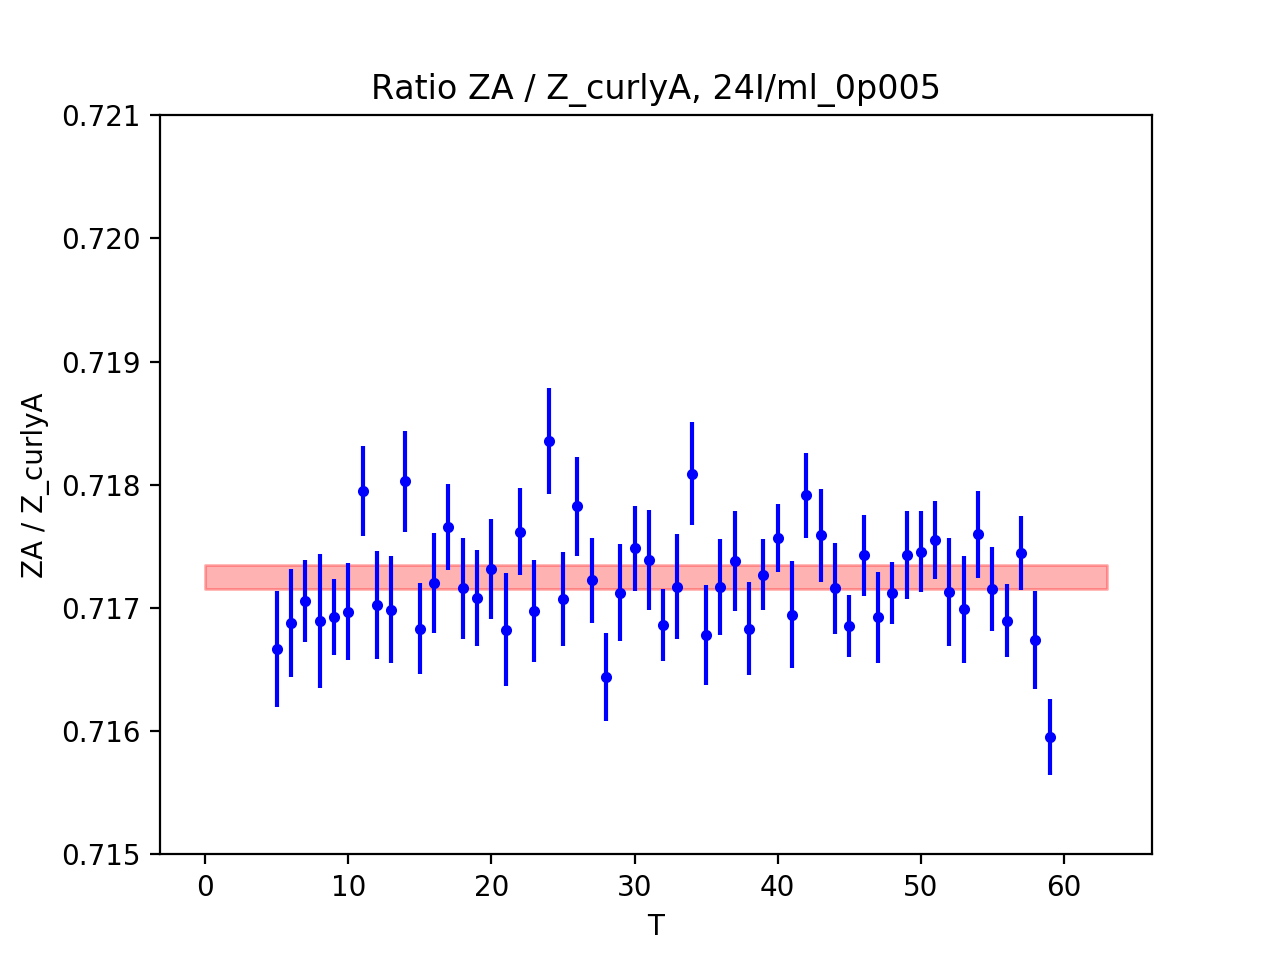

In [41]:
window_size = 0.001
Zwindow = range(Zratio_boot_mu.shape[0])
plt.figure()
plt.errorbar(Zwindow, Zratio_boot_mu, yerr = Zratio_boot_sigma, fmt = '.', c = 'b')
plt.fill_between(Zwindow, Zratio_mu - Zratio_sigma, Zratio_mu + Zratio_sigma, color = 'r', alpha = 0.3)
# plt.xlim((0, T // 2))
# plt.ylim((Zratio_mu - window_size, Zratio_mu + window_size))
plt.ylim((0.715, 0.721))
plt.title('Ratio ZA / Z_curlyA, ' + config)
plt.xlabel('T')
plt.ylabel('ZA / Z_curlyA')
plt.show()

# Compute pion decay constant with a few different methods

### (Method 1) Divide out time dependence and fit to a constant

In [42]:
# get overlap factor for the wall source. Divide out by the exponentials
time_dep_plus = np.zeros((n_boot, T), dtype = np.float64)
time_dep_minus = np.zeros((n_boot, T), dtype = np.float64)
for bidx in range(n_boot):
    for t in range(T):
        time_dep_plus[bidx, t] = np.exp(-ampi_00WW_boot[bidx] * t) + np.exp(-ampi_00WW_boot[bidx] * (T - t))
        time_dep_minus[bidx, t] = np.exp(-ampi_00WW_boot[bidx] * t) - np.exp(-ampi_00WW_boot[bidx] * (T - t))
# for the pion-pion correlators, use + and for the axial-pion correlator use -
pion00WW_overlap_sq_boot = np.real(C2_boot / time_dep_plus)
for bidx in range(n_boot):
    pion00WW_overlap_sq_boot[bidx,:] = pion00WW_overlap_sq_boot[bidx, :] * (2 * ampi_00WW_boot[bidx]) * (L ** 3)#*ainv_ensemble[bidx])
pion00WW_overlap_boot = np.sqrt(pion00WW_overlap_sq_boot)        # this should be N_pionOOWW
# pion00WW_overlap_boot = pion00WW_overlap_sq_boot        # this should be N_pionOOWW
pion00WW_overlap_mu = np.mean(pion00WW_overlap_boot, axis = 0)
pion00WW_overlap_sigma = np.std(pion00WW_overlap_boot, axis = 0, ddof = 1)

NameError: name 'ampi_00WW_boot' is not defined

In [ ]:
# fit_range_pion00WW = range(15, 45)
fit_range_pion00WW = range(20, 40)
N_pion00WW, chi2_N_pion00WW, ndof_pion00WW = fit_constant(fit_range_pion00WW, pion00WW_overlap_boot)
chi2_ndof_N_pion00WW = chi2_N_pion00WW / ndof_pion00WW
N_pion00WW_mu = np.mean(N_pion00WW)
N_pion00WW_sigma = np.std(N_pion00WW, ddof = 1)
print('Overlap pion-00WW fit: N_P^WW = ' + np.format_float_scientific(N_pion00WW_mu) + '\pm ' \
      + np.format_float_scientific(N_pion00WW_sigma))
print('chi^2 / ndof for this fit: ' + str(chi2_ndof_N_pion00WW))
# N^2 / 2m = 2.229(19)e
# np.sqrt(N_pion00WW_mu * 2 * 432.2 * 32 / 4)    # this is about what |N| is? I'm just putting random numbers together

In [ ]:
# np.sqrt((L ** 3) * N_pion00WW_mu * 2 * ampi_mu)

In [ ]:
# Extract overlap
plt.figure()
plt.errorbar(range(T), pion00WW_overlap_mu, pion00WW_overlap_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_pion00WW, N_pion00WW_mu - N_pion00WW_sigma, N_pion00WW_mu \
                 + N_pion00WW_sigma, color = 'r', alpha = 0.3)
plt.title('Overlap factor for pion-00WW, |N_P^WW|')
# plt.title('Overlap factor for pion-00WW, N_P^2 / 2mpi')
plt.xlabel('t')
plt.ylabel('|Overlap|')
plt.ylim((0.95 * (N_pion00WW_mu - N_pion00WW_sigma), 1.05 * (N_pion00WW_mu + N_pion00WW_sigma)))
plt.show()

In [ ]:
# 00WP overlap
pion00WP_overlap_sq_boot = np.real(C2_pion00WP / time_dep_plus)
for bidx in range(n_boot):
    pion00WP_overlap_sq_boot[bidx,:] = pion00WP_overlap_sq_boot[bidx, :] * (2 * ampi_00WW_boot[bidx]) * (L ** 3)
pion00WP_overlap_boot = np.sqrt(pion00WP_overlap_sq_boot)        # this should be N_pionOOWW
pion00WP_overlap_mu = np.mean(pion00WP_overlap_boot, axis = 0)
pion00WP_overlap_sigma = np.std(pion00WP_overlap_boot, axis = 0, ddof = 1)

In [ ]:
fit_range_pion00WP = range(15, 45)
# fit_range_pion00WP = range(15, 30)
# fit_range_pion00WP = range(35, 50)
N_pion00WP, chi2_N_pion00WP, ndof_N_pion00WP = fit_constant(fit_range_pion00WP, pion00WP_overlap_boot)
chi2_ndof_N_pion00WP = chi2_N_pion00WP / ndof_N_pion00WP
N_pion00WP_mu = np.mean(N_pion00WP)
N_pion00WP_sigma = np.std(N_pion00WP, ddof = 1)
print('Overlap pion-00WP fit: ' + str(N_pion00WP_mu) + '\pm ' + str(N_pion00WP_sigma))
print('chi^2 / ndof for this fit: ' + str(chi2_ndof_N_pion00WP))

In [ ]:
# Extract overlap
plt.figure()
plt.errorbar(range(T), pion00WP_overlap_mu, pion00WP_overlap_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_pion00WP, N_pion00WP_mu - N_pion00WP_sigma, N_pion00WP_mu + N_pion00WP_sigma, color = 'r', alpha = 0.3)
plt.title('Overlap factor for pion-00WP, |N_P^WP|')
plt.xlabel('t')
plt.ylabel('|Overlap|')
plt.ylim((0.95 * (N_pion00WP_mu - N_pion00WP_sigma), 1.05 * (N_pion00WP_mu + N_pion00WP_sigma)))
plt.show()

In [ ]:
# fpOOWW: antisymmetric and time_dep_minus goes to 0 at T / 2
fp00WP_overlap_sq_boot = np.abs(C2_fpWP / time_dep_minus)
# TODO replace this with something that's actually correct-- FOLD AROUND MIDPOINT INSTEAD
fp00WP_overlap_sq_boot[np.isinf(fp00WP_overlap_sq_boot)] = 0
for bidx in range(n_boot):
    fp00WP_overlap_sq_boot[bidx,:] = fp00WP_overlap_sq_boot[bidx, :] * (2 * ampi_00WW_boot[bidx]) * (L ** 3)
# TODO: write out the equations for what overlap factor this is
# fp00WP_overlap_boot = np.sqrt(fp00WP_overlap_sq_boot)
# Since this is mixed axial-pseudoscalar, divide out by the pseudoscalar one
fp00WP_overlap_boot = np.abs(fp00WP_overlap_sq_boot) / np.abs(pion00WP_overlap_boot)
# fold over since it's antisymmetric
fp00WP_overlap_boot = np.real(fold(fp00WP_overlap_boot, T, folder = np.add))
fp00WP_overlap_mu = np.mean(fp00WP_overlap_boot, axis = 0)
fp00WP_overlap_sigma = np.std(fp00WP_overlap_boot, axis = 0, ddof = 1)

In [ ]:
# fit_range_fp00WP = range(10, 30)
fit_range_fp00WP = range(15, 30)
N_fp00WP, chi2_N_fp00WP, ndof_N_fp00WP = fit_constant(fit_range_fp00WP, fp00WP_overlap_boot)
chi2_ndof_N_fp00WP = chi2_N_fp00WP / ndof_N_fp00WP
N_fp00WP_mu = np.mean(N_fp00WP)
N_fp00WP_sigma = np.std(N_fp00WP, ddof = 1)
print('Overlap fp00WP fit: ' + str(N_fp00WP_mu) + '\pm ' + str(N_fp00WP_sigma))
print('chi^2 / ndof for this fit: ' + str(chi2_ndof_N_fp00WP))

In [ ]:
# Extract overlap. Note that we've artifically set the midpoint to 0 as there's a divide by 0 there
plt.figure()
plt.errorbar(range(T // 2 + 1), fp00WP_overlap_mu, fp00WP_overlap_sigma, fmt = '.', c = 'b')
# plt.errorbar(range(T), fp00WP_overlap_mu, fp00WP_overlap_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_fp00WP, N_fp00WP_mu - N_fp00WP_sigma, N_fp00WP_mu + N_fp00WP_sigma, color = 'r', alpha = 0.3)
plt.title('|N_A^WP|')
plt.xlabel('t')
plt.ylabel('|Overlap|')
plt.ylim((0.95 * (N_fp00WP_mu - N_fp00WP_sigma), 1.05 * (N_fp00WP_mu + N_fp00WP_sigma)))
plt.show()

In [ ]:
# combine and get estimate for fpi
vol = L ** 3
afpi_boot = (1 / (ampi_00WW_boot * vol)) * np.abs(N_pion00WP) * np.abs(N_fp00WP) / np.abs(N_pion00WW)
afpi_mu = np.mean(afpi_boot)
afpi_sigma = np.std(afpi_boot, ddof = 1)
print('afpi bare = ' + str(afpi_mu) + ' \pm ' + str(afpi_sigma))

In [ ]:
# Renormalize fpi
afpi_renorm_boot = Zratio_fits * afpi_boot
afpi_renorm_mu = np.mean(afpi_renorm_boot, axis = 0)
afpi_renorm_sigma = np.std(afpi_renorm_boot, axis = 0, ddof = 1)
print('afpi renorm = ' + str(afpi_renorm_mu) + ' \pm ' + str(afpi_renorm_sigma))

### (Method 2) VarPro with results from effective mass fit

In [ ]:
# fit C2_boot at each bootstrap by plugging in our fit result for mpi. Note that m = vector of length N_params
N_params = 1
f0 = lambda m, t : np.exp(-m[0] * t) + np.exp(-m[0] * (T - t))
f_fit = [f0]        # should be a vector of size N_params
A = lambda m : np.array([[f_fit[i](m, t) / C2_boot_sigma[t] for i in range(N_params)] for t in range(T)])
z = np.array([[C2_boot[bidx, t] / C2_boot_sigma[t] for t in range(T)] for bidx in range(n_boot)])
a_boot = np.zeros((n_boot), dtype = np.float64)
for bidx in range(n_boot):
    m_boot = np.array([ampi_00WW_boot[bidx]])    # guess for b
    Ab = A(m_boot)
    #a_boot[bidx] = np.sum(Ab * z[bidx]) / np.sum(Ab * Ab)
    a_boot[bidx] = ahat(Ab, z[bidx])
a_boot_mu = np.mean(a_boot)        # Should expect that a_boot = |N|^2 / 2m
a_boot_sigma = np.std(a_boot, ddof = 1)
print('Method 2, Overlap |N_W|^2 / 2m = ' + np.format_float_scientific(a_boot_mu) + ' \pm ' \
      + np.format_float_scientific(a_boot_sigma))
# 2.318(14) e8

In [ ]:
# 2.3189662580853543e+08 \pm 1.4320112779951137e+06

### (Method 3) VarPro

In [ ]:
# Minimize chi^2 for a(b) and get results for b parameter (which is mpi)
m_varpro = np.zeros((n_boot), dtype = np.float64)
m0 = np.array([ampi_00WW_mu], dtype = np.float64)
for bidx in range(n_boot):
    out = optimize.minimize(chi2_varpro, m0, args = (A, z[bidx]), method = 'Powell')
    m_varpro[bidx] = out['x']

In [ ]:
m_varpro_mu = np.mean(m_varpro)
m_varpro_sigma = np.std(m_varpro, ddof = 1)
print('mpi from varpro = ' + str(m_varpro_mu) + ' \pm ' + str(m_varpro_sigma))

In [ ]:
# get back overlap factor
varpro_overlap = np.array([ahat(A([m_varpro[bidx]]), z[bidx]) for bidx in range(n_boot)])
varpro_overlap_mu = np.mean(varpro_overlap)
varpro_overlap_sigma = np.std(varpro_overlap, ddof = 1)
print('Varpro overlap factor: |N|^2 / 2m = ' + np.format_float_scientific(varpro_overlap_mu) + ' \pm ' \
      + np.format_float_scientific(varpro_overlap_sigma))

# Save data for mpi, fpi, ZA

In [ ]:
print('a*m_pi for pion-00WW = ' + str(ampi_00WW_mu) + ' \pm ' + str(ampi_00WW_sigma))
print('ZA / Z_curlyA = ' + str(Zratio_mu) + ' \pm ' + str(Zratio_sigma))
print('Overlap pion-00WW fit: N_P^WW = ' + np.format_float_scientific(N_pion00WW_mu) + '\pm ' \
      + np.format_float_scientific(N_pion00WW_sigma))
print('afpi bare = ' + str(afpi_mu) + ' \pm ' + str(afpi_sigma))
print('afpi renorm = ' + str(afpi_renorm_mu) + ' \pm ' + str(afpi_renorm_sigma))

In [ ]:
# fout_path = '/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/analysis_output/'+config+'/twopt_out.h5'
# fout = h5py.File(fout_path, 'w')
# fout['ampi'] = ampi_00WW_boot
# fout['afpi'] = afpi_renorm_boot
# fout['ZA_ratio'] = Zratio_boot
# fout.close()

## Old fitting code which chooses a fit range by hand

#### pion-00WW

In [ ]:
m_eff_00WW_mu = np.mean(m_eff_00WW, axis = 0)
m_eff_00WW_sigma = np.std(m_eff_00WW, axis = 0, ddof = 1)

# fit_range = range(5, 20)
fit_range_00WW = range(15, 30)
# fit_range = range(10, 26)
ampi_00WW_boot, ampi_00WW_chi2, ampi_00WW_ndof = fit_constant(fit_range_00WW, m_eff_00WW)
ampi_00WW_chi2_ndof = ampi_00WW_chi2 / ampi_00WW_ndof
ampi_00WW_mu = np.mean(ampi_00WW_boot)
ampi_00WW_sigma = np.std(ampi_00WW_boot, ddof = 1)
print('a*m_pi for pion-00WW = ' + str(ampi_00WW_mu) + ' \pm ' + str(ampi_00WW_sigma))
print('chi^2 / ndof for this fit = ' + str(ampi_00WW_chi2_ndof))
# m_pi = 0.2412069567584312 \pm 0.00058483300634162

In [ ]:
plt.figure()
plt.errorbar(range(m_eff_00WW_mu.shape[0]), m_eff_00WW_mu, yerr = m_eff_00WW_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_00WW, ampi_00WW_mu - ampi_00WW_sigma, ampi_00WW_mu + ampi_00WW_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
# plt.ylim((0.22, 0.28))
# plt.title('Cosh-corrected effective mass, pion-00WW, ' + config)
plt.ylim((ampi_00WW_mu - 50 * ampi_00WW_sigma, ampi_00WW_mu + 50 * ampi_00WW_sigma))
plt.title('Cosh-corrected effective mass for pion-00WW, ' + config)
plt.xlabel('t / 2')
plt.ylabel('$a m_{\\pi}$')
plt.show()

#### pion-00WP

In [ ]:
# save fits to file and use that in chiral extrapolation
fit_range_mpi_00WP = range(15, 30)
ampi_00WP_boot, ampi_00WP_chi2, ampi_00WP_ndof = fit_constant(fit_range_mpi_00WP, m_eff_00WP)
ampi_00WP_chi2_ndof = ampi_00WP_chi2 / ampi_00WP_ndof
ampi_00WP_mu = np.mean(ampi_00WP_boot)
ampi_00WP_sigma = np.std(ampi_00WP_boot, ddof = 1)
print('a*m_pi for 00WP = ' + str(ampi_00WP_mu) + ' \pm ' + str(ampi_00WP_sigma))
print('chi^2 / ndof for 00WP = ' + str(ampi_00WP_chi2_ndof))

In [ ]:
plt.figure()
plt.errorbar(range(m_eff_00WW_mu.shape[0]), m_eff_00WP_mu, yerr = m_eff_00WP_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_mpi_00WP, ampi_00WP_mu - ampi_00WP_sigma, ampi_00WP_mu + ampi_00WP_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
# plt.ylim((0.23, 0.255))
plt.ylim((ampi_00WP_mu - 20 * ampi_00WP_sigma, ampi_00WP_mu + 20 * ampi_00WP_sigma))
plt.title('Cosh-corrected effective mass, pion-00WP, ' + config)
plt.xlabel('T / 2')
plt.ylabel('a * mpi')
plt.show()